In [5]:
import nibabel as nib

In [10]:
path = r"C:\Users\danku\Documents\Уроки\ENS\3A\MVA\S1\Medical imaging\Training Batch 1\segmentations\segmentation-27.nii"

In [11]:
img = nib.load(path).get_fdata()
img.shape

(512, 512, 861)




            0noisy1clean2trained tiny DnCNN - it 0 - 18.471048 (dB)3trained tiny DnCNN - it 250 - 28.116884 (dB)4trained tiny DnCNN - it 500 - 28.236277 (dB)5trained tiny DnCNN - it 750 - 28.440226 (dB)6trained tiny DnCNN - it 1000 - 28.542931 (dB)7original dct - 27.860847 (dB)




.gallery2 {
    position: relative;
    width: 900px;
    height: 650px; }
.gallery2 .index {
    padding: 0;
    margin: 0;
    width: 10.5em;
    list-style: none; }
.gallery2 .index li {
    margin: 0;
    padding: 0;
    float: left;}
.gallery2 .index a { /* gallery2 item title */
    display: block;
    background-color: #EEEEEE;
    border: 1px solid #FFFFFF;
    text-decoration: none;
    width: 1.9em;
    padding: 6px; }
.gallery2 .index a span { /* gallery2 item content */
    display: block;
    position: absolute;
    left: -9999px; /* hidden */
    top: 0em;
    padding-left: 0em; }
.gallery2 .index a span img{ /* gallery2 item content */
    max-width: 100%;
    }
.gallery2 .index li:first-child a span {
    top: 0em;
    left: 10.5em;
    z-index: 99; }
.gallery2 .index a:hover {
    border: 1px solid #888888; }
.gallery2 .index a:hover span {
    left: 10.5em;
    z-index: 100; }



In [ ]:



            0noisy1clean2trained tiny DnCNN - it 0 - 18.471048 (dB)3trained tiny DnCNN - it 250 - 28.116884 (dB)4trained tiny DnCNN - it 500 - 28.236277 (dB)5trained tiny DnCNN - it 750 - 28.440226 (dB)6trained tiny DnCNN - it 1000 - 28.542931 (dB)7original dct - 27.860847 (dB)




.gallery2 {
    position: relative;
    width: 900px;
    height: 650px; }
.gallery2 .index {
    padding: 0;
    margin: 0;
    width: 10.5em;
    list-style: none; }
.gallery2 .index li {
    margin: 0;
    padding: 0;
    float: left;}
.gallery2 .index a { /* gallery2 item title */
    display: block;
    background-color: #EEEEEE;
    border: 1px solid #FFFFFF;
    text-decoration: none;
    width: 1.9em;
    padding: 6px; }
.gallery2 .index a span { /* gallery2 item content */
    display: block;
    position: absolute;
    left: -9999px; /* hidden */
    top: 0em;
    padding-left: 0em; }
.gallery2 .index a span img{ /* gallery2 item content */
    max-width: 100%;
    }
.gallery2 .index li:first-child a span {
    top: 0em;
    left: 10.5em;
    z-index: 99; }
.gallery2 .index a:hover {
    border: 1px solid #888888; }
.gallery2 .index a:hover span {
    left: 10.5em;
    z-index: 100; }



In [ ]:



            0noisy1clean2trained tiny DnCNN - it 0 - 18.471048 (dB)3trained tiny DnCNN - it 250 - 28.116884 (dB)4trained tiny DnCNN - it 500 - 28.236277 (dB)5trained tiny DnCNN - it 750 - 28.440226 (dB)6trained tiny DnCNN - it 1000 - 28.542931 (dB)7original dct - 27.860847 (dB)




.gallery2 {
    position: relative;
    width: 900px;
    height: 650px; }
.gallery2 .index {
    padding: 0;
    margin: 0;
    width: 10.5em;
    list-style: none; }
.gallery2 .index li {
    margin: 0;
    padding: 0;
    float: left;}
.gallery2 .index a { /* gallery2 item title */
    display: block;
    background-color: #EEEEEE;
    border: 1px solid #FFFFFF;
    text-decoration: none;
    width: 1.9em;
    padding: 6px; }
.gallery2 .index a span { /* gallery2 item content */
    display: block;
    position: absolute;
    left: -9999px; /* hidden */
    top: 0em;
    padding-left: 0em; }
.gallery2 .index a span img{ /* gallery2 item content */
    max-width: 100%;
    }
.gallery2 .index li:first-child a span {
    top: 0em;
    left: 10.5em;
    z-index: 99; }
.gallery2 .index a:hover {
    border: 1px solid #888888; }
.gallery2 .index a:hover span {
    left: 10.5em;
    z-index: 100; }



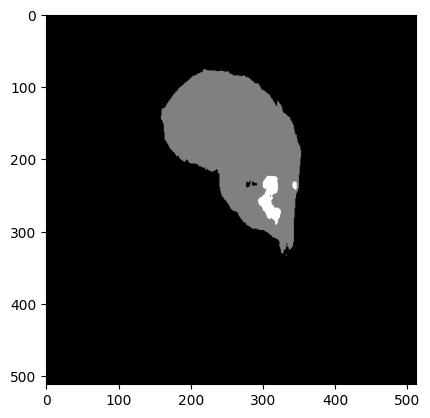

In [20]:
plt.imshow(img[:,:,483],cmap='gray')

In [5]:
import torch
import torch.optim as optim
from torch.utils.data import DataLoader
import numpy as np
import os
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F_trans
from tqdm import tqdm

# --- IMPORTS FROM YOUR ORIGINAL FILES ---
from unet import UNetModel
from gaussian_diffusion import GaussianDiffusionModel, get_beta_schedule
import data_loader

# --- CONFIGURATION (ARGS) ---
# Based on the LiTS configuration you provided earlier
ARGS = {
    "dataset": "lits",
    "data_path": "../data/LiTS",  # Update this if needed
    "output_path": "../output/LiTS",

    # Training Params
    "img_size": 128,
    "batch_size": 4,          # Reduced for stability
    "epochs": 5,              # Reduced for demonstration (increase to 100+ for real results)
    "lr": 1e-4,
    "num_training_data": 200, # Reduced for speed in this demo

    # Diffusion Params
    "noise_steps": 1000,
    "beta_schedule": "cosine",
    "noise_fn": "gaussian",   # Using gaussian for standard training (or use 'synomaly')
    "noise_params": {
        "anomaly_sigma": 3,
        "anomaly_threshold": 175,
        "anomaly_offset": 1,
        "anomaly_direction": -1
    },

    # Model Architecture (Must match UNetModel)
    "in_channels": 1,
    "model_channels": 64,      # 64 for lighter memory usage
    "out_channels": 1,
    "num_res_blocks": 2,
    "attention_resolutions": "32,16,8",
    "dropout": 0.0,
    "channel_mult": "1,2,2,2",
    "num_heads": 2,
    "num_head_channels": 64,
    "conv_resample": True,
    "dims": 2,
    "num_classes": None,
    "use_checkpoint": False,
    "num_heads_upsample": -1,
    "use_scale_shift_norm": False,
    "resblock_updown": True,
    "use_new_attention_order": False,

    # Loss
    "loss-type": "l2",
    "device": "cuda" if torch.cuda.is_available() else "cpu"
}

# --- 1. TRAINING FUNCTION ---
def train_model(args):
    print(f"--- Starting Training on {args['device']} ---")

    # 1. Initialize Model
    model = UNetModel(
        image_size=args['img_size'], in_channels=args['in_channels'],
        model_channels=args['model_channels'], out_channels=args['out_channels'],
        num_res_blocks=args['num_res_blocks'], attention_resolutions=args['attention_resolutions'],
        dropout=args['dropout'], channel_mult=args['channel_mult'], num_heads=args['num_heads'],
        num_head_channels=args['num_head_channels'], conv_resample=args['conv_resample'],
        dims=args['dims'], num_classes=args['num_classes'], use_checkpoint=args['use_checkpoint'],
        num_heads_upsample=args['num_heads_upsample'], use_scale_shift_norm=args['use_scale_shift_norm'],
        resblock_updown=args['resblock_updown'], use_new_attention_order=args['use_new_attention_order']
    ).to(args['device'])
    model.train()

    # 2. Initialize Diffusion (Using your GaussianDiffusionModel)
    betas = get_beta_schedule(args['beta_schedule'], args['noise_steps'])

    # CORRECTION: Removed 'args=args' which caused the TypeError
    diffusion = GaussianDiffusionModel(
            args['img_size'], betas, img_channels=args['in_channels'], loss_type=args['loss-type'],
            loss_weight="None", noise_fn=args["noise_fn"], noise_params=args["noise_params"], diffusion_mode="training"
            )

    # 3. Load Data
    try:
        train_dataset, _ = data_loader.get_training_data(args)
        dataloader = DataLoader(train_dataset, batch_size=args['batch_size'], shuffle=True)
    except Exception as e:
        print(f"Warning: Could not load real data ({e}). Creating dummy data for demonstration.")
        dummy_data = torch.randn(20, 1, 128, 128)
        dataset = torch.utils.data.TensorDataset(dummy_data)
        dataloader = DataLoader(dataset, batch_size=args['batch_size'], shuffle=True)

    optimizer = optim.AdamW(model.parameters(), lr=args['lr'])

    # 4. Training Loop
    for epoch in range(args['epochs']):
        epoch_loss = []
        pbar = tqdm(dataloader, desc=f"Epoch {epoch+1}/{args['epochs']}")

        for batch in pbar:
            if isinstance(batch, list) or isinstance(batch, tuple):
                x = batch[0]
            else:
                x = batch

            x = x.to(args['device'])

            # Sample random timesteps
            t = torch.randint(0, args['noise_steps'], (x.shape[0],), device=args['device']).long()

            # Calculate Loss using GaussianDiffusionModel.p_loss
            losses = diffusion.p_loss(model, x, t)
            loss = losses["loss"].mean()

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            epoch_loss.append(loss.item())
            pbar.set_postfix(loss=loss.item())

    # Save Model
    os.makedirs(args['output_path'], exist_ok=True)
    save_path = os.path.join(args['output_path'], "multistage_demo_model.pt")
    torch.save(model.state_dict(), save_path)
    print(f"Model saved to {save_path}")

    return model, diffusion

# --- 2. MULTI-STAGE INFERENCE FUNCTION ---
def multi_stage_inference(model, diffusion, x_0, args,
                          steps_per_stage=250,
                          max_stages=5,
                          blur_kernel_size=15,
                          threshold=0.3):
    """
    Implements the Multi-Stage Diffusion algorithm (Bi et al., 2025)
    using the existing GaussianDiffusionModel logic.
    """
    model.eval()
    device = args['device']
    x_tilde = x_0.clone().to(device)

    if steps_per_stage >= args['noise_steps']:
        raise ValueError(f"steps_per_stage ({steps_per_stage}) must be < noise_steps ({args['noise_steps']})")

    print(f"\n--- Running Multi-Stage Inference (Max {max_stages} stages) ---")

    last_mask_sum = 0
    final_mask = None

    for n in range(max_stages):
        # 1. Noising (Partial Diffusion)
        t_tensor = torch.tensor([steps_per_stage], device=device).long().repeat(x_tilde.shape[0])

        noise = torch.randn_like(x_tilde)
        x_noised = diffusion.q_sample(x_tilde, t_tensor, noise=noise)

        # 2. Denoising (Prediction of x_0)
        with torch.no_grad():
            predicted_noise = model(x_noised, t_tensor)

            alphas_cumprod = diffusion.alphas_cumprod.to(device)
            alpha_bar = alphas_cumprod[t_tensor][:, None, None, None]

            x_hat = (x_noised - torch.sqrt(1 - alpha_bar) * predicted_noise) / torch.sqrt(alpha_bar)
            x_hat = torch.clamp(x_hat, -1, 1)

        # 3. Anomaly Mask Calculation
        sigma = 0.3 * ((blur_kernel_size - 1) * 0.5 - 1) + 0.8

        img_blurred = F_trans.gaussian_blur(x_0.to(device), blur_kernel_size, sigma)
        x_hat_blurred = F_trans.gaussian_blur(x_hat, blur_kernel_size, sigma)

        diff_map = torch.abs(img_blurred - x_hat_blurred)
        mask_n = (diff_map > threshold).float()

        # 4. Termination Criterion
        current_mask_sum = torch.sum(mask_n).item()
        if n > 0 and last_mask_sum > 0:
            rel_change = abs(current_mask_sum - last_mask_sum) / last_mask_sum
            print(f"Stage {n+1}: Mask relative change = {rel_change:.4f}")
            if rel_change < 0.01:
                print("-> Convergence reached.")
                final_mask = mask_n
                break
        else:
            print(f"Stage {n+1}: Initial mask generated.")

        last_mask_sum = current_mask_sum
        final_mask = mask_n

        # 5. Masked Fusion
        x_tilde = mask_n * x_hat + (1 - mask_n) * x_0.to(device)

    return x_tilde, final_mask, x_hat

# --- 3. MAIN EXECUTION ---
if __name__ == "__main__":

    # A. TRAIN THE MODEL
    trained_model, diffusion_instance = train_model(ARGS)

    # B. PREPARE TEST DATA
    print("\nPreparing Test Image...")

    test_img = torch.zeros(1, 1, 128, 128)
    y, x = torch.meshgrid(torch.arange(128), torch.arange(128), indexing='ij')
    mask_circle = ((x - 64)**2 + (y - 64)**2) < 30**2
    test_img[0, 0, mask_circle] = -0.5

    test_img_anomalous = test_img.clone()
    test_img_anomalous[0, 0, 50:70, 50:70] = 0.8

    test_img_anomalous = test_img_anomalous.to(ARGS['device'])

    # C. RUN MULTI-STAGE INFERENCE
    STEPS_PER_STAGE = 250
    KERNEL_SIZE = 15
    THRESHOLD = 0.2

    fused_img, anomaly_mask, raw_recon = multi_stage_inference(
        trained_model,
        diffusion_instance,
        test_img_anomalous,
        ARGS,
        steps_per_stage=STEPS_PER_STAGE,
        blur_kernel_size=KERNEL_SIZE,
        threshold=THRESHOLD
    )

    # D. VISUALIZE RESULTS
    print("Displaying results...")
    def to_cpu(t): return (t.detach().cpu().squeeze().numpy() + 1) / 2

    fig, axs = plt.subplots(1, 4, figsize=(16, 4))

    axs[0].imshow(to_cpu(test_img_anomalous), cmap='gray')
    axs[0].set_title("1. Input (Anomalous)")

    axs[1].imshow(to_cpu(raw_recon), cmap='gray')
    axs[1].set_title(f"2. Reconstruction (Stage Final)")

    axs[2].imshow(anomaly_mask.detach().cpu().squeeze(), cmap='gray')
    axs[2].set_title("3. Anomaly Mask")

    axs[3].imshow(to_cpu(fused_img), cmap='gray')
    axs[3].set_title("4. Fused Output")

    for ax in axs: ax.axis('off')
    plt.show()

--- Starting Training on cuda ---
Training on 200 images


Epoch 1/5:   0%|          | 0/5 [00:00<?, ?it/s]


AttributeError: 'GaussianDiffusionModel' object has no attribute 'weights'

In [ ]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os

def visualize_from_processed_data(output_path):
    """
    Charge les fichiers .pkl générés par data_preprocessing_lits.py
    et affiche une image avec l'anomalie.
    """

    # Noms des fichiers tels que définis dans votre script original
    images_file = os.path.join(output_path, "test_anomalous_abdomen_dataset.pkl")
    masks_file = os.path.join(output_path, "test_anomalous_tumor_masks.pkl")

    # Vérification de l'existence des fichiers
    if not os.path.exists(images_file) or not os.path.exists(masks_file):
        print(f"Erreur : Impossible de trouver les fichiers .pkl dans le dossier : {output_path}")
        print("Vérifiez que le chemin 'output_path' correspond bien à celui utilisé lors du pré-traitement.")
        return

    print("Chargement des fichiers pickle en cours...")

    with open(images_file, "rb") as f:
        abdomen_dataset = pickle.load(f)

    with open(masks_file, "rb") as f:
        tumor_masks = pickle.load(f)

    num_images = len(abdomen_dataset)
    print(f"Chargement terminé. {num_images} images anomales disponibles.")

    if num_images == 0:
        print("Le dataset sauvegardé est vide.")
        return

    # --- CHOIX D'UNE IMAGE ---
    # On prend une image au hasard parmi celles sauvegardées
    idx = np.random.randint(0, num_images)

    # --- AFFICHAGE ---
    plt.figure(figsize=(10, 5))

    # Image de gauche : Abdomen
    plt.subplot(1, 2, 1)
    plt.imshow(abdomen_dataset[idx], cmap='gray')
    plt.title(f"Abdomen Anormal (Index: {idx})")
    plt.axis('off')

    # Image de droite : Masque de la tumeur
    plt.subplot(1, 2, 2)
    plt.imshow(tumor_masks[idx], cmap='gray')
    plt.title("Masque de l'anomalie")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # IMPORTANT : Mettez ici le chemin 'output_path' que vous aviez configuré
    # dans votre fichier data_preprocessing_lits.py

    # Si vous aviez mis using_server = True :
    # path_to_pkl = "/home/data/lucie_huang/lits"

    # Si vous aviez mis using_server = False (local) :
    path_to_pkl = "../output/LiTS"

    visualize_from_processed_data(path_to_pkl)

Chargement des fichiers pickle en cours...
Chargement terminé. 1000 images anomales disponibles.


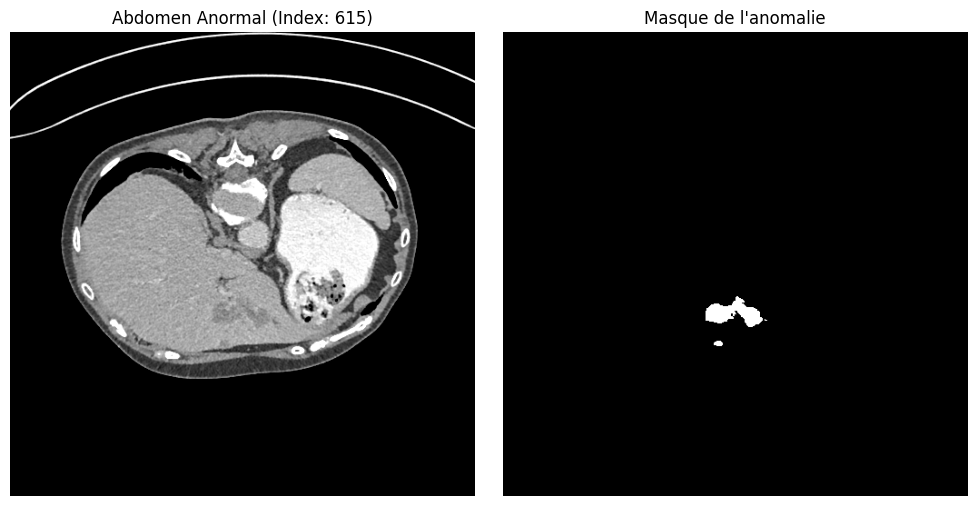

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os

def visualize_from_processed_data(output_path):
    """
    Charge les fichiers .pkl générés par data_preprocessing_lits.py
    et affiche une image avec l'anomalie.
    """

    # Noms des fichiers tels que définis dans votre script original
    images_file = os.path.join(output_path, "test_anomalous_abdomen_dataset.pkl")
    masks_file = os.path.join(output_path, "test_anomalous_tumor_masks.pkl")

    # Vérification de l'existence des fichiers
    if not os.path.exists(images_file) or not os.path.exists(masks_file):
        print(f"Erreur : Impossible de trouver les fichiers .pkl dans le dossier : {output_path}")
        print("Vérifiez que le chemin 'output_path' correspond bien à celui utilisé lors du pré-traitement.")
        return

    print("Chargement des fichiers pickle en cours...")

    with open(images_file, "rb") as f:
        abdomen_dataset = pickle.load(f)

    with open(masks_file, "rb") as f:
        tumor_masks = pickle.load(f)

    num_images = len(abdomen_dataset)
    print(f"Chargement terminé. {num_images} images anomales disponibles.")

    if num_images == 0:
        print("Le dataset sauvegardé est vide.")
        return

    # --- CHOIX D'UNE IMAGE ---
    # On prend une image au hasard parmi celles sauvegardées
    idx = np.random.randint(0, num_images)

    # --- AFFICHAGE ---
    plt.figure(figsize=(10, 5))

    # Image de gauche : Abdomen
    plt.subplot(1, 2, 1)
    plt.imshow(abdomen_dataset[idx], cmap='gray')
    plt.title(f"Abdomen Anormal (Index: {idx})")
    plt.axis('off')

    # Image de droite : Masque de la tumeur
    plt.subplot(1, 2, 2)
    plt.imshow(tumor_masks[idx], cmap='gray')
    plt.title("Masque de l'anomalie")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # IMPORTANT : Mettez ici le chemin 'output_path' que vous aviez configuré
    # dans votre fichier data_preprocessing_lits.py

    # Si vous aviez mis using_server = True :
    # path_to_pkl = "/home/data/lucie_huang/lits"

    # Si vous aviez mis using_server = False (local) :
    path_to_pkl = "../output/LiTS"

    visualize_from_processed_data(path_to_pkl)

In [14]:
from PIL import Image
import numpy as np

def load_png_to_numpy_array(image_path):
    """
    Charge un fichier PNG à partir de son chemin et le convertit en un tableau NumPy.

    Args:
        image_path (str): Le chemin d'accès au fichier PNG.

    Returns:
        np.array: Le tableau NumPy représentant l'image, ou None si une erreur survient.
    """
    try:
        # 1. Charger l'image en utilisant Pillow
        img = Image.open(image_path)

        # 2. Convertir l'objet Image en tableau NumPy
        # Le tableau aura généralement la forme (hauteur, largeur, canaux)
        numpy_array = np.array(img)

        print(f"Image chargée. Forme du tableau : {numpy_array.shape}")
        print(f"Type de données : {numpy_array.dtype}")

        return numpy_array

    except FileNotFoundError:
        print(f"Erreur : Le fichier n'a pas été trouvé à l'adresse {image_path}")
        return None
    except Exception as e:
        print(f"Une erreur s'est produite lors du chargement ou de la conversion : {e}")
        return None

# --- EXEMPLE D'UTILISATION ---

# Remplacez ceci par le chemin réel de votre fichier .png
image_file_path = r"C:\Users\danku\Documents\Уроки\ENS\3A\MVA\S1\Medical imaging\Figures\shrek.jpg"

# Si vous travaillez dans un environnement où vous n'avez pas d'image,
# vous pouvez utiliser un chemin absolu ou un chemin relatif.
# Exemple avec un chemin absolu (à modifier sur votre machine) :
# image_file_path = "/Users/votre_nom/Documents/images/photo.png"


# Execution de la fonction
image_data = load_png_to_numpy_array(image_file_path)

if image_data is not None:
    # Vous pouvez maintenant utiliser 'image_data' pour vos calculs
    # Par exemple, afficher la valeur du premier pixel (R, V, B ou Gris)
    print(f"Premier pixel (Haut-Gauche) : {image_data[0, 0]}")
    #

Image chargée. Forme du tableau : (549, 824, 3)
Type de données : uint8
Premier pixel (Haut-Gauche) : [160 186 221]


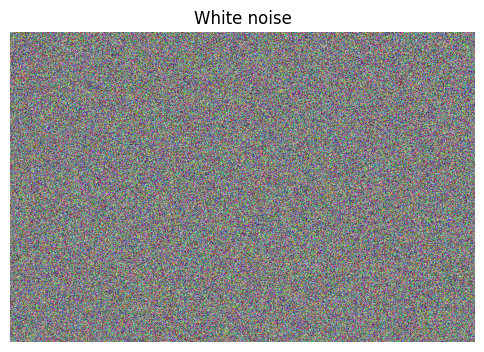

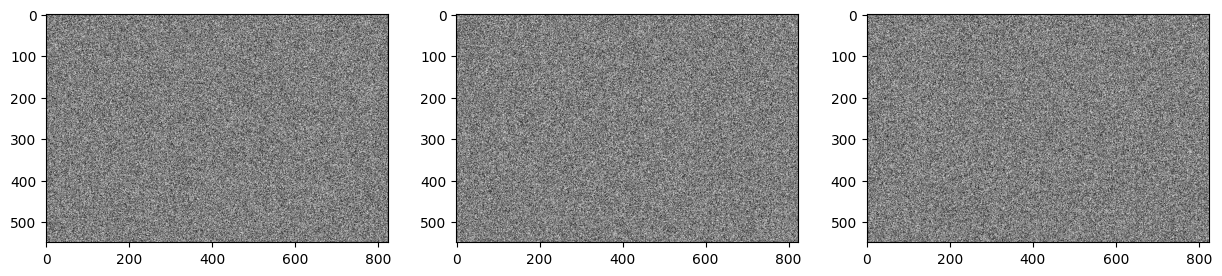

In [37]:
eps = np.random.normal(loc=0.0, scale=150.0, size=image_data.shape).astype(image_data.dtype)

import numpy as np
import matplotlib.pyplot as plt
eps_original=eps
eps_min = eps_original.min()
eps_max = eps_original.max()

# Si vous voulez afficher le bruit autour de zéro (comme c'est le cas pour le bruit blanc),
# vous normalisez autour d'un point central.
# Normalisation Min-Max: Décalage (pour que min=0) puis division par l'étendue (max-min)
eps_normalized = (eps_original - eps_min) / (eps_max - eps_min)
plt.figure(figsize=(6, 6))

# Matplotlib interprète un tableau (H, W, 3) de floats dans [0, 1] comme une image RVB couleur.
plt.imshow(eps_normalized)

plt.title(f"White noise")
plt.xlabel(f"Canaux affichés : {['Rouge', 'Vert', 'Bleu']}")
plt.axis('off')

# Affichage des 3 canaux séparément pour référence
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
titles = ["Canal Rouge", "Canal Vert", "Canal Bleu"]

for i in range(3):
    # On affiche chaque canal en niveaux de gris (cmap='gray')
    axes[i].imshow(eps_original[:, :, i], cmap='gray', vmin=eps_min, vmax=eps_max)
    axes

In [38]:
np.max(image_data)

np.uint8(255)

In [39]:
np.max(eps_normalized)

np.float64(1.0)

(np.float64(-0.5), np.float64(823.5), np.float64(548.5), np.float64(-0.5))

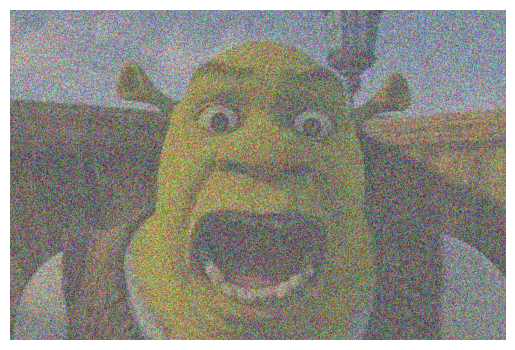

In [43]:
betterschrek=2/3*eps_normalized+1/3*image_data/255
plt.imshow(betterschrek, cmap='gray', vmin=eps_min, vmax=eps_max)
plt.axis('off')


Bruit généré de forme : torch.Size([1, 128, 128])
Type du bruit : torch.float32


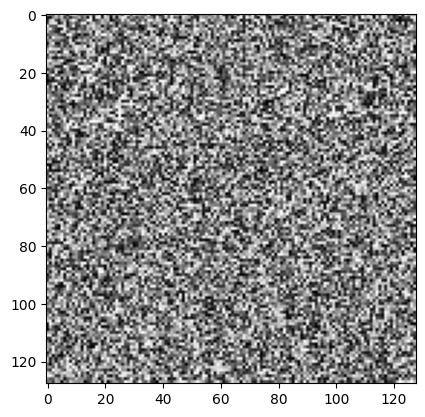

In [13]:
import torch
import numpy as np

# --- IMPLÉMENTATION FACTICE DE LA CLASSE SIMPLEX ---
# REMPLACER CECI par l'importation réelle de votre librairie Simplex Noise !
class DummySimplex:
    def newSeed(self):
        # Simule l'initialisation de la graine
        pass

    # Cette méthode doit retourner un tableau NumPy de la forme demandée
    def rand_3d_octaves(self, shape, octave, persistence, frequency):
        # Le bruit 2D est souvent généré en 3D où la première dimension est le canal/lot
        # Ici, nous créons un bruit aléatoire simple pour l'exemple
        noise_np = np.random.rand(*shape).astype(np.float32)
        # En réalité, cette méthode générerait le bruit Simplex avec les paramètres fournis
        return noise_np * 2.0 - 1.0 # Normalisation entre -1 et 1

# --- VOTRE FONCTION ---
def generate_simplex_noise(simplex_instance, x, octave=6, persistence=0.8, frequency=64):
    """
    Génère du bruit de Simplex.
    """
    simplex_instance.newSeed()
    # x.shape est utilisé pour définir la taille du bruit (par exemple, (1, 128, 128))
    noise = torch.from_numpy(simplex_instance.rand_3d_octaves(x.shape, octave, persistence, frequency)).to(x.device)
    return noise

# --- UTILISATION POUR GÉNÉRER DU BRUIT 128x128 ---
# 1. Instancier la classe Simplex Noise (utilisez votre classe réelle)
simplex_generator = DummySimplex() # Remplacer par l'instance réelle (ex: SimplexNoise(seed))

# 2. Créer un tenseur "factice" (dummy tensor) pour définir la taille
# Nous choisissons (Canaux=1, Hauteur=128, Largeur=128)
H, W = 128, 128
dummy_tensor = torch.zeros((1, H, W))

# 3. Générer le bruit
# Vous pouvez ajuster octave, persistence et frequency ici
simplex_noise = generate_simplex_noise(
    simplex_generator,
    dummy_tensor,
    octave=3,
    persistence=0.2,
    frequency=1
)

# 4. Vérifier la sortie
print(f"Bruit généré de forme : {simplex_noise.shape}")
print(f"Type du bruit : {simplex_noise.dtype}")

# Optionnel : Afficher le bruit (si vous utilisez Matplotlib)
import matplotlib.pyplot as plt
plt.imshow(simplex_noise.squeeze().cpu().numpy(), cmap='gray')
# plt.title('Simplex Noise 128x128')
# plt.show()

In [17]:
import numpy as np
import torch
from opensimplex import OpenSimplex
from typing import Tuple

# --- FONCTION CORRIGÉE ---
def generate_simplex_with_opensimplex(
    shape: Tuple[int, int],
    octaves: int,
    persistence: float,
    base_scale: float,
    seed: int = 0  # <--- NOUVEAU PARAMÈTRE REQUIS
) -> torch.Tensor:
    """
    Génère du bruit Simplex 2D en utilisant opensimplex, adapté pour des dimensions (H, W).
    """
    H, W = shape
    world = np.zeros((H, W), dtype=np.float32)

    # CORRECTION : Ajout de l'argument 'seed'
    noise_generator = OpenSimplex(seed=seed)

    # Boucle pour l'addition des octaves (FBM)
    for i in range(H):
        for j in range(W):
            noise_val = 0.0
            amplitude = 1.0
            frequency = 1.0

            for k in range(octaves):
                x = i * frequency / base_scale
                y = j * frequency / base_scale

                # Génération du bruit 2D
                noise_val += noise_generator.noise2d(x=x, y=y) * amplitude

                # Mise à jour pour la prochaine octave
                amplitude *= persistence
                frequency *= 2.0

            world[i][j] = noise_val

    # Normalisation du bruit
    min_val, max_val = world.min(), world.max()
    if max_val > min_val:
        world = 2.0 * (world - min_val) / (max_val - min_val) - 1.0

    noise_tensor = torch.from_numpy(world).unsqueeze(0)

    return noise_tensor

# --- UTILISATION CORRIGÉE (avec un seed) ---
H, W = 128, 128
smooth_noise = generate_simplex_with_opensimplex(
    shape=(H, W),
    octaves=3,
    persistence=0.2,
    base_scale=200.0,
    seed=1234  # <--- NOUVEL ARGUMENT À FOURNIR
)

print(f"Bruit Simplex généré de forme : {smooth_noise.shape}")

AttributeError: 'OpenSimplex' object has no attribute 'noise2d'

In [18]:
import numpy as np
import torch
from opensimplex import OpenSimplex
from typing import Tuple

# --- FONCTION CORRIGÉE ---
def generate_simplex_with_opensimplex(
    shape: Tuple[int, int],
    octaves: int,
    persistence: float,
    base_scale: float,
    seed: int = 0
) -> torch.Tensor:

    H, W = shape
    world = np.zeros((H, W), dtype=np.float32)

    # Initialisation avec le seed
    noise_generator = OpenSimplex(seed=seed)

    # Boucle pour l'addition des octaves (FBM)
    for i in range(H):
        for j in range(W):
            noise_val = 0.0
            amplitude = 1.0
            frequency = 1.0

            for k in range(octaves):
                x = i * frequency / base_scale
                y = j * frequency / base_scale

                # CORRECTION : Utilisation de .noise() au lieu de .noise2d()
                noise_val += noise_generator.noise(x=x, y=y) * amplitude

                # Mise à jour pour la prochaine octave
                amplitude *= persistence
                frequency *= 2.0

            world[i][j] = noise_val

    # Normalisation du bruit
    min_val, max_val = world.min(), world.max()
    if max_val > min_val:
        world = 2.0 * (world - min_val) / (max_val - min_val) - 1.0

    noise_tensor = torch.from_numpy(world).unsqueeze(0)

    return noise_tensor

# --- UTILISATION ---
H, W = 128, 128
smooth_noise = generate_simplex_with_opensimplex(
    shape=(H, W),
    octaves=3,
    persistence=0.2,
    base_scale=200.0,
    seed=1234
)

print(f"Bruit Simplex généré de forme : {smooth_noise.shape}")

AttributeError: 'OpenSimplex' object has no attribute 'noise'

In [27]:
import numpy as np
import torch
from perlin_noise import PerlinNoise
from typing import Tuple

def generate_perlin_fbm_noise(
    shape: Tuple[int, int],
    octaves: int,
    persistence: float,
    frequency: float,
    seed: int = 0
) -> torch.Tensor:
    """
    Génère du bruit de Perlin 2D détaillé via FBM (Fractal Brownian Motion).

    :param shape: La forme du bruit (Hauteur, Largeur).
    :param octaves: Nombre d'octaves (complexité).
    :param persistence: Facteur d'amplitude pour les détails fins (contraste).
    :param frequency: Fréquence de base du motif (taille des formes).
    :param seed: Graine pour la reproductibilité.
    :return: Tenseur PyTorch (1, H, W) du bruit.
    """
    H, W = shape

    # La librairie PerlinNoise utilise "octaves" pour la FBM (Fractal Brownian Motion).
    # Nous devons ajuster la fréquence de base par le facteur N, car PerlinNoise
    # utilise une fréquence de base pour l'ensemble de la FBM.

    # Nous utilisons la valeur 1 / frequency pour définir l'échelle de base,
    # car une petite fréquence (ex: 1) signifie de grandes formes, ce qui correspond
    # à un petit nombre de divisions (ex: 1/1=1).
    noise_generator = PerlinNoise(
        octaves=frequency,  # 'octaves' dans cette librairie définit la fréquence de base.
        seed=seed
    )

    pic = []
    for i in range(H):
        row = []
        for j in range(W):
            # La méthode .noise() prend les coordonnées (x, y) et génère le bruit FBM en un seul appel.
            # Les paramètres 'octaves' et 'persistence' sont implémentés dans la méthode .noise() elle-même.
            # Nous les gérons manuellement pour mieux coller à la structure FBM classique:

            # --- Application Manuelle de FBM pour contrôler la Persistence ---
            noise_val = 0.0
            amplitude = 1.0
            total_amplitude = 0.0 # Pour la normalisation

            for k in range(octaves):
                # La fréquence augmente à chaque octave.
                freq = frequency * (2**k)

                # Génération du bruit (le résultat est souvent entre -1 et 1)
                n = noise_generator([i/H * freq, j/W * freq])

                noise_val += n * amplitude
                total_amplitude += amplitude

                # Mise à jour pour l'octave suivante
                amplitude *= persistence

            # Normalisation par l'amplitude totale
            row.append(noise_val / total_amplitude)

        pic.append(row)

    # Conversion en tenseur PyTorch et ajout de la dimension de canal
    world = np.array(pic, dtype=np.float32)

    # Optionnel : recentrage sur [-1, 1] si la normalisation par total_amplitude ne suffit pas.
    min_val, max_val = world.min(), world.max()
    if max_val > min_val:
        world = 2.0 * (world - min_val) / (max_val - min_val) - 1.0

    noise_tensor = torch.from_numpy(world).unsqueeze(0)

    return noise_tensor

# --- Utilisation pour un résultat LISSE (selon vos paramètres initiaux) ---
H, W = 128, 128
smooth_noise = generate_perlin_fbm_noise(
    shape=(H, W),
    octaves=5,
    persistence=0.3, # Faible: les détails fins sont très atténués
    frequency=3.0,   # Fréquence très faible: grandes formes
    seed=1234
)

print(f"Bruit Lisse de Perlin généré de forme : {smooth_noise.shape}")

Bruit Lisse de Perlin généré de forme : torch.Size([1, 128, 128])


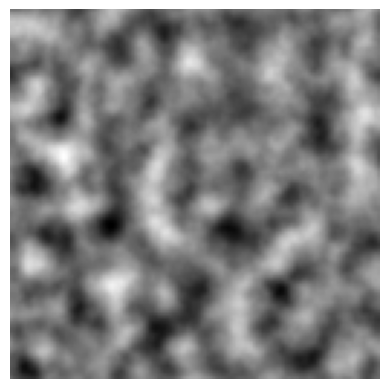

In [29]:
a=smooth_noise.squeeze().cpu().numpy()
plt.imshow(a, cmap='gray')
plt.axis("off") # Optionnel, mais utile pour voir les valeurs du bruit
plt.show() # Pour afficher la fenêtre

(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

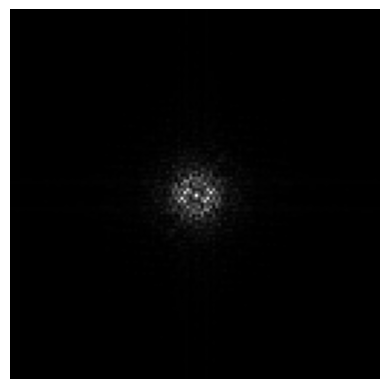

In [32]:
plt.imshow(np.fft.fftshift(np.abs(np.fft.fft2(a))), cmap='gray')
plt.axis("off")

(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

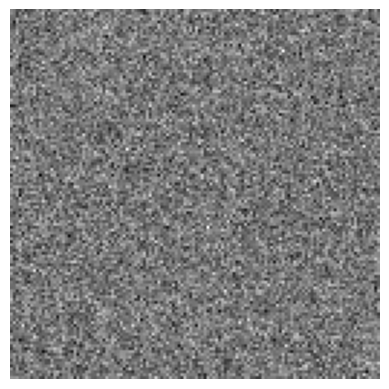

In [33]:
b=np.random.randn(H, W)
plt.imshow(b, cmap='gray')
plt.axis("off")

(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

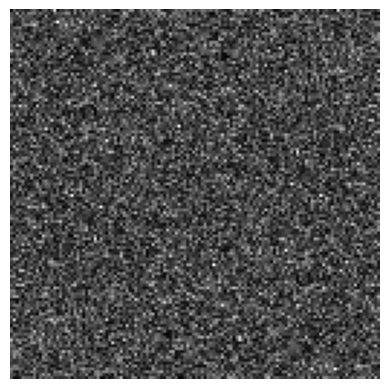

In [34]:
plt.imshow(np.abs(np.fft.fft2(b)), cmap='gray')
plt.axis("off")

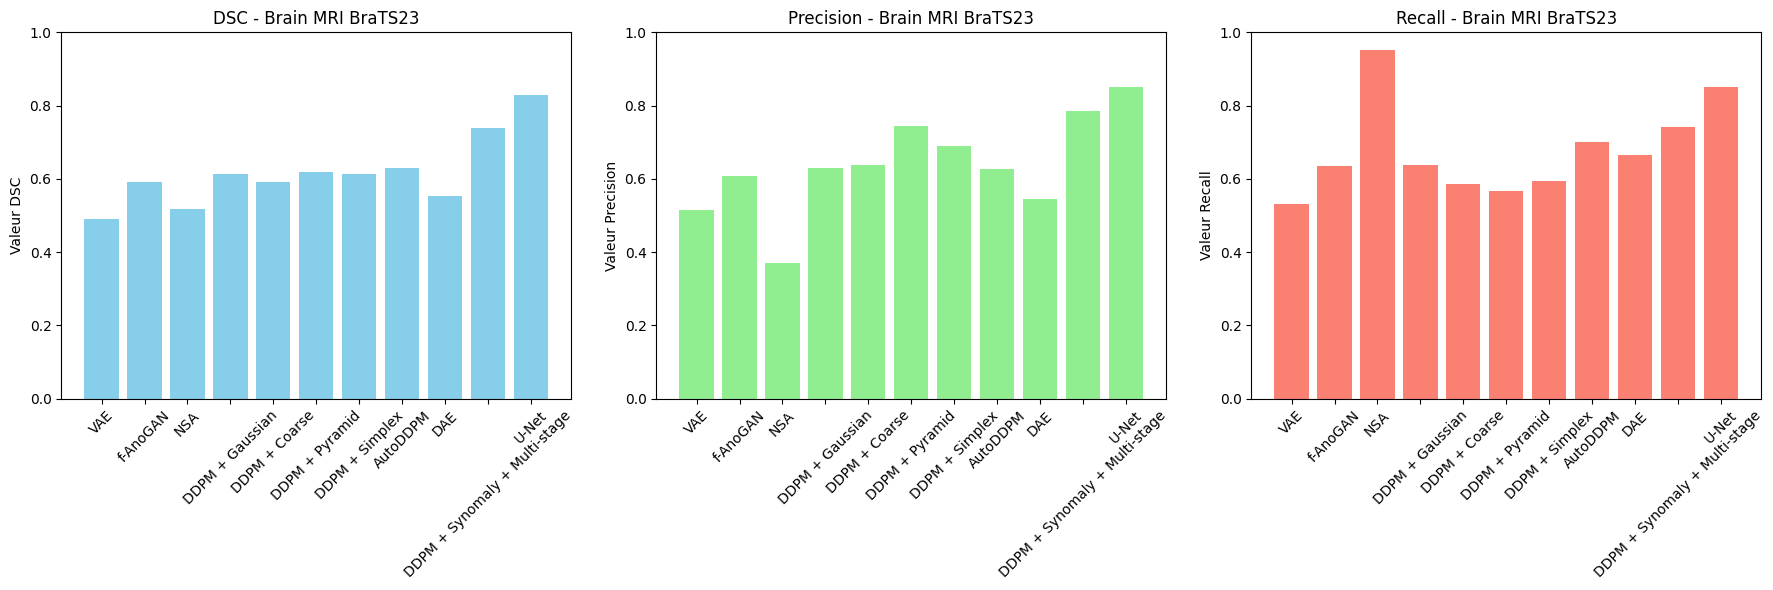

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Données pour Brain MRI BraTS23
methods = [
    "VAE", "f-AnoGAN", "NSA", "DDPM + Gaussian", "DDPM + Coarse",
    "DDPM + Pyramid", "DDPM + Simplex", "AutoDDPM", "DAE",
    "DDPM + Synomaly + Multi-stage", "U-Net"
]

dsc_values = [
    0.490, 0.592, 0.519, 0.613, 0.592, 0.620, 0.613, 0.629, 0.553, 0.739, 0.828
]

precision_values = [
    0.514, 0.609, 0.370, 0.630, 0.637, 0.743, 0.689, 0.627, 0.544, 0.786, 0.850
]

recall_values = [
    0.532, 0.634, 0.951, 0.638, 0.585, 0.566, 0.595, 0.702, 0.664, 0.741, 0.850
]

# Configuration des histogrammes
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Histogramme pour DSC
axs[0].bar(methods, dsc_values, color='skyblue')
axs[0].set_title('DSC - Brain MRI BraTS23')
axs[0].set_ylabel('Valeur DSC')
axs[0].set_ylim(0, 1)
axs[0].tick_params(axis='x', rotation=45)

# Histogramme pour Precision
axs[1].bar(methods, precision_values, color='lightgreen')
axs[1].set_title('Precision - Brain MRI BraTS23')
axs[1].set_ylabel('Valeur Precision')
axs[1].set_ylim(0, 1)
axs[1].tick_params(axis='x', rotation=45)

# Histogramme pour Recall
axs[2].bar(methods, recall_values, color='salmon')
axs[2].set_title('Recall - Brain MRI BraTS23')
axs[2].set_ylabel('Valeur Recall')
axs[2].set_ylim(0, 1)
axs[2].tick_params(axis='x', rotation=45)

# Ajustement de la disposition
plt.tight_layout()
plt.show()


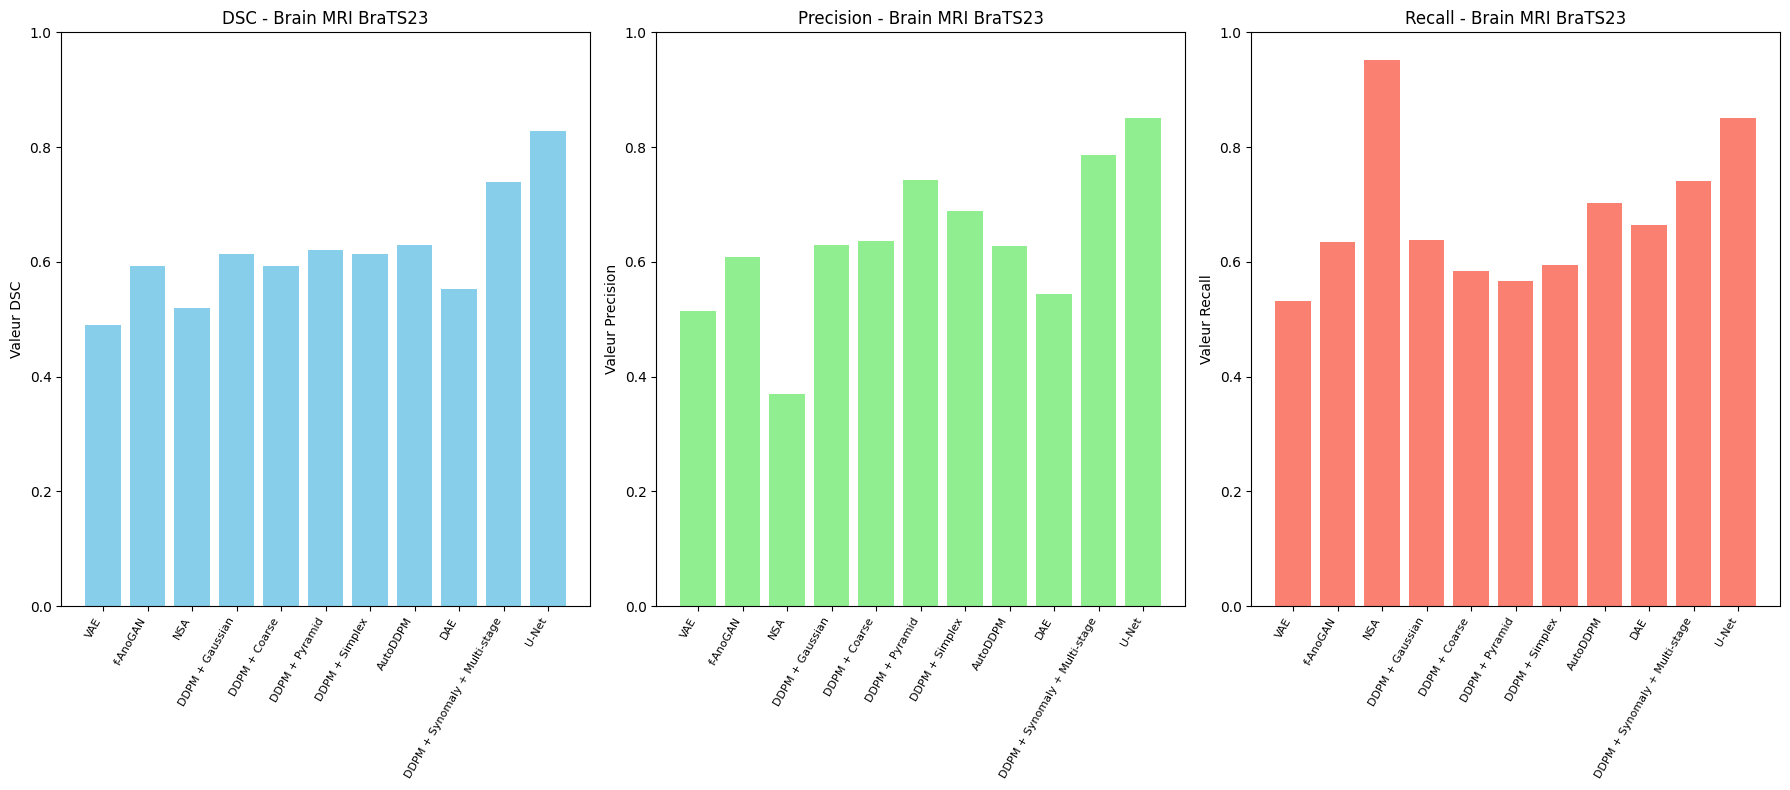

In [2]:
import matplotlib.pyplot as plt

# Données pour Brain MRI BraTS23
methods = [
    "VAE", "f-AnoGAN", "NSA", "DDPM + Gaussian", "DDPM + Coarse",
    "DDPM + Pyramid", "DDPM + Simplex", "AutoDDPM", "DAE",
    "DDPM + Synomaly + Multi-stage", "U-Net"
]

dsc_values = [
    0.490, 0.592, 0.519, 0.613, 0.592, 0.620, 0.613, 0.629, 0.553, 0.739, 0.828
]

precision_values = [
    0.514, 0.609, 0.370, 0.630, 0.637, 0.743, 0.689, 0.627, 0.544, 0.786, 0.850
]

recall_values = [
    0.532, 0.634, 0.951, 0.638, 0.585, 0.566, 0.595, 0.702, 0.664, 0.741, 0.850
]

# Configuration des histogrammes
fig, axs = plt.subplots(1, 3, figsize=(18, 8))

# Histogramme pour DSC
axs[0].bar(methods, dsc_values, color='skyblue')
axs[0].set_title('DSC - Brain MRI BraTS23')
axs[0].set_ylabel('Valeur DSC')
axs[0].set_ylim(0, 1)
axs[0].tick_params(axis='x', rotation=60, labelsize=8)
axs[0].set_xticks(range(len(methods)))
axs[0].set_xticklabels(methods, ha='right')

# Histogramme pour Precision
axs[1].bar(methods, precision_values, color='lightgreen')
axs[1].set_title('Precision - Brain MRI BraTS23')
axs[1].set_ylabel('Valeur Precision')
axs[1].set_ylim(0, 1)
axs[1].tick_params(axis='x', rotation=60, labelsize=8)
axs[1].set_xticks(range(len(methods)))
axs[1].set_xticklabels(methods, ha='right')

# Histogramme pour Recall
axs[2].bar(methods, recall_values, color='salmon')
axs[2].set_title('Recall - Brain MRI BraTS23')
axs[2].set_ylabel('Valeur Recall')
axs[2].set_ylim(0, 1)
axs[2].tick_params(axis='x', rotation=60, labelsize=8)
axs[2].set_xticks(range(len(methods)))
axs[2].set_xticklabels(methods, ha='right')

# Ajustement de la disposition
plt.tight_layout()
plt.show()


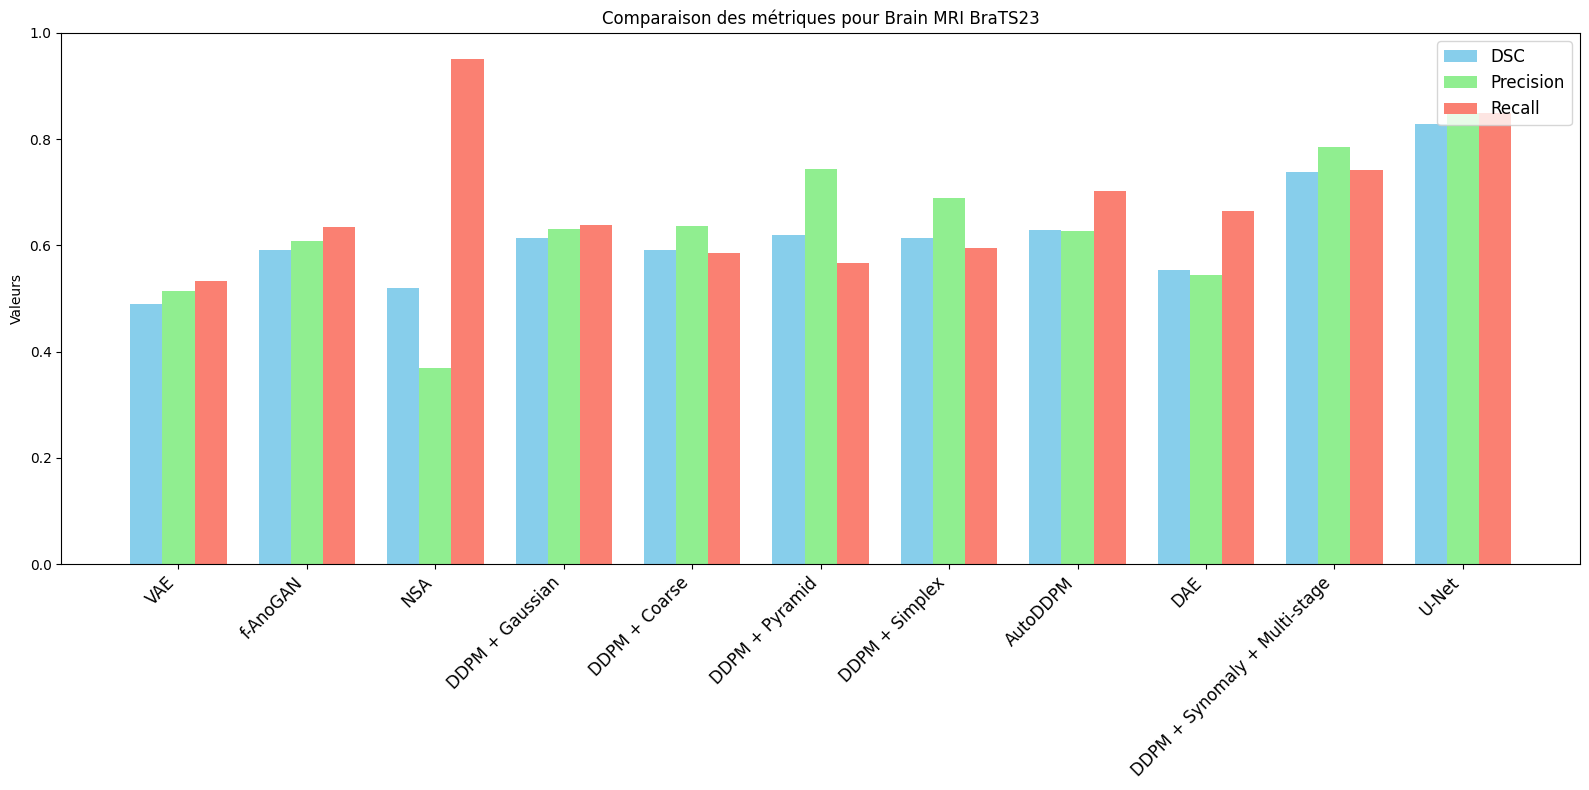

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Données pour Brain MRI BraTS23
methods = [
    "VAE", "f-AnoGAN", "NSA", "DDPM + Gaussian", "DDPM + Coarse",
    "DDPM + Pyramid", "DDPM + Simplex", "AutoDDPM", "DAE",
    "DDPM + Synomaly + Multi-stage", "U-Net"
]

dsc_values = [
    0.490, 0.592, 0.519, 0.613, 0.592, 0.620, 0.613, 0.629, 0.553, 0.739, 0.828
]

precision_values = [
    0.514, 0.609, 0.370, 0.630, 0.637, 0.743, 0.689, 0.627, 0.544, 0.786, 0.850
]

recall_values = [
    0.532, 0.634, 0.951, 0.638, 0.585, 0.566, 0.595, 0.702, 0.664, 0.741, 0.850
]

# Largeur des barres
bar_width = 0.25

# Position des barres sur l'axe x
r1 = np.arange(len(methods))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Création de l'histogramme groupé
fig, ax = plt.subplots(figsize=(16, 8))

# Barres pour DSC, Precision, Recall
ax.bar(r1, dsc_values, color='skyblue', width=bar_width, label='DSC')
ax.bar(r2, precision_values, color='lightgreen', width=bar_width, label='Precision')
ax.bar(r3, recall_values, color='salmon', width=bar_width, label='Recall')

# Configuration des axes et des étiquettes
ax.set_ylabel('Valeurs')
ax.set_title('Comparaison des métriques pour Brain MRI BraTS23')
ax.set_xticks([r + bar_width for r in range(len(methods))])
ax.set_xticklabels(methods, rotation=45, ha='right', fontsize=12)
ax.set_ylim(0, 1)

# Légende
ax.legend(loc='upper right',fontsize=12)

# Ajustement de la disposition
plt.tight_layout()
plt.savefig('histogramme_groupe_brats.png', dpi=300, bbox_inches='tight')
plt.show()


In [8]:
import nibabel as nib
import numpy as np
import glob
import pickle
import os
import random
import cv2
import math
from matplotlib import pyplot as plt

random.seed(314)
np.random.seed(314)

def generate_lits_datasets(volume_files, segmentation_files, num_anomalous_data=1000):
    """
    Parcourt les paires de volume/segmentation LiTS, applique le prétraitement (recadrage HU, normalisation),
    sépare les tranches en saines (healthy) et anormales (anomalous), et génère les jeux de données finaux.

    :param volume_files: Liste des chemins des fichiers de volume.
    :param segmentation_files: Liste des chemins des fichiers de segmentation.
    :param num_anomalous_data: Nombre maximum de tranches anormales à conserver pour le jeu de test.
    :return: healthy train/test datasets with liver masks, anomalous test dataset with tumor masks (sous forme de listes/np.array).
    """

    healthy_abdomen_images = []
    healthy_liver_masks = []
    anomalous_abdomen_images = []
    tumor_masks = []

    # ----------------------------------------------------------------
    # 1. PARAMÈTRES DE PRÉTRAITEMENT
    # ----------------------------------------------------------------
    HU_min = -200 # Seuil bas pour le foie/tissus mous
    HU_max = 250  # Seuil haut pour le foie/tissus mous

    # NOTE: Ces images ne sont PAS redimensionnées ici (512x512)
    # La redimensionnement (e.g., 128x128) est fait plus tard par le DataLoader.

    for i in range(len(volume_files)):
        print(f"Processing volume {i+1}/{len(volume_files)}: {os.path.basename(volume_files[i])}")

        try:
            # Charger les données NIfTI
            volume_data = nib.load(volume_files[i]).get_fdata().astype(np.float32)
            segmentation_data = nib.load(segmentation_files[i]).get_fdata().astype(np.uint8)
        except Exception as e:
            print(f"Erreur lors du chargement: {e}")
            continue

        # Assurer la cohérence (Z, Y, X) ou (Y, X, Z) selon le besoin.
        # LiTS est souvent chargé comme (X, Y, Z), transposer en (Z, X, Y) pour itération par tranche (Z).
        # Nous allons itérer sur l'axe Z (tranches).
        volume_data = np.transpose(volume_data, (2, 1, 0))
        segmentation_data = np.transpose(segmentation_data, (2, 1, 0))

        # ----------------------------------------------------------------
        # 2. NORMALISATION ET MASQUAGE
        # ----------------------------------------------------------------

        # Recadrage et Normalisation Min-Max [0, 1]
        volume_data = np.clip(volume_data, HU_min, HU_max)
        volume_data = (volume_data - HU_min) / (HU_max - HU_min)

        # Définition des masques: 0: Arrière-plan, 1: Foie, 2: Tumeur
        liver_mask_all = (segmentation_data == 1) | (segmentation_data == 2) # Foie + Tumeur
        tumor_mask = segmentation_data == 2 # Tumeur seule

        num_slices = volume_data.shape[0]

        for z in range(num_slices):
            v_slice = volume_data[z, :, :]
            l_mask_slice = liver_mask_all[z, :, :]
            t_mask_slice = tumor_mask[z, :, :]

            # Si la tranche contient du Foie (avec ou sans tumeur)
            if np.any(l_mask_slice):
                # Image du Foie seulement (le reste est mis à 0 après normalisation)
                masked_v_slice = v_slice.copy()
                masked_v_slice[~l_mask_slice] = 0.0

                # Cas Anormal (Anomalous): Tumeur présente
                if np.any(t_mask_slice):
                    anomalous_abdomen_images.append(masked_v_slice)
                    tumor_masks.append(t_mask_slice)

                # Cas Sain (Healthy): Foie présent, AUCUNE Tumeur
                else:
                    healthy_abdomen_images.append(masked_v_slice)
                    healthy_liver_masks.append(l_mask_slice)

        # Libérer la mémoire (optionnel)
        del volume_data, segmentation_data

    print(f"\n--- Prétraitement Terminé ---")
    print(f"Total tranches Saines trouvées: {len(healthy_abdomen_images)}")
    print(f"Total tranches Anormales trouvées: {len(anomalous_abdomen_images)}")

    # Convertir en np.array pour faciliter le slicing
    healthy_abdomen_images = np.array(healthy_abdomen_images, dtype=np.float32)
    healthy_liver_masks = np.array(healthy_liver_masks, dtype=np.uint8)
    anomalous_abdomen_images = np.array(anomalous_abdomen_images, dtype=np.float32)
    tumor_masks = np.array(tumor_masks, dtype=np.uint8)

    # ----------------------------------------------------------------
    # 3. SÉPARATION TRAIN/TEST (HEALTHY) ET SOUS-ÉCHANTILLONNAGE (ANOMALOUS)
    # ----------------------------------------------------------------

    # 80% pour l'entraînement, 20% pour le test (healthy)
    all_healthy_indices = np.arange(len(healthy_abdomen_images))
    random.shuffle(all_healthy_indices)

    split_idx = int(0.8 * len(healthy_abdomen_images))
    train_indices = all_healthy_indices[:split_idx]
    test_healthy_indices = all_healthy_indices[split_idx:]

    train_healthy_abdomen_images = healthy_abdomen_images[train_indices]
    train_healthy_liver_masks = healthy_liver_masks[train_indices]
    test_healthy_abdomen_images = healthy_abdomen_images[test_healthy_indices]
    test_healthy_liver_masks = healthy_liver_masks[test_healthy_indices]

    # Sous-échantillonnage des données anormales (anomalous) pour le test
    if len(anomalous_abdomen_images) > num_anomalous_data:
        test_anomalous_indices = np.random.choice(len(anomalous_abdomen_images), size=num_anomalous_data, replace=False)
        test_anomalous_abdomen_images = anomalous_abdomen_images[test_anomalous_indices]
        test_tumor_masks = tumor_masks[test_anomalous_indices]
    else:
        test_anomalous_abdomen_images = anomalous_abdomen_images
        test_tumor_masks = tumor_masks

    return (train_healthy_abdomen_images, train_healthy_liver_masks,
            test_healthy_abdomen_images, test_healthy_liver_masks,
            test_anomalous_abdomen_images, test_tumor_masks)


def run_lits_preprocessing(raw_data_path, output_path, start_id, end_id, show_images=False):
    """
    Fonction principale pour charger, traiter et sauvegarder le jeu de données LiTS.
    """

    # 1. Création du dossier de sortie
    os.makedirs(output_path, exist_ok=True)

    print(f"Collecte des fichiers LiTS dans {raw_data_path}")

    # 2. Construction des chemins de fichiers pour la plage [start_id, end_id]
    volume_files = []
    segmentation_files = []

    for i in range(start_id, end_id + 1):
        # Utilisation de os.path.join pour la compatibilité des chemins Windows
        vol_name = f"volume-{i}.nii"
        seg_name = f"segmentation-{i}.nii"

        vol_path = os.path.join(raw_data_path, vol_name)
        seg_path = os.path.join(raw_data_path, seg_name)

        # Vérification si les fichiers existent (peut être .nii ou .nii.gz)
        if os.path.exists(vol_path):
            volume_files.append(vol_path)
            segmentation_files.append(seg_path)
        elif os.path.exists(vol_path + '.gz'):
            volume_files.append(vol_path + '.gz')
            segmentation_files.append(seg_path + '.gz')
        else:
            print(f"Avertissement: Fichiers manquants pour l'ID {i}.")

    if not volume_files:
        print("ERREUR: Aucun volume LiTS trouvé dans la plage spécifiée.")
        return

    print(f"Nombre total de paires volume/segmentation trouvées: {len(volume_files)}")

    # 3. Génération des jeux de données prétraités
    (train_healthy_images, train_healthy_masks,
     test_healthy_images, test_healthy_masks,
     test_anomalous_images, test_tumor_masks) = generate_lits_datasets(
        volume_files, segmentation_files
    )

    # 4. Sauvegarde des jeux de données dans le dossier de sortie

    datasets_to_save = {
        "train_healthy_abdomen_dataset.pkl": train_healthy_images,
        "train_healthy_liver_masks.pkl": train_healthy_masks,
        "test_healthy_abdomen_dataset.pkl": test_healthy_images,
        "test_anomalous_abdomen_dataset.pkl": test_anomalous_images,
        "test_anomalous_tumor_masks.pkl": test_tumor_masks
    }

    for filename, data_array in datasets_to_save.items():
        save_path = os.path.join(output_path, filename)
        with open(save_path, "wb") as f:
            pickle.dump(data_array, f)
        print(f"Sauvegardé {filename}: {len(data_array)} tranches.")

    if show_images and len(test_anomalous_images) > 0:
        # Afficher un exemple de tranche anormale pour vérification
        idx = np.random.randint(0, len(test_anomalous_images))

        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(test_anomalous_images[idx], cmap='gray')
        plt.title("Image Anormale (Foie Masqué)")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(test_tumor_masks[idx], cmap='gray')
        plt.title("Masque de Tumeur (Vérité Terrain)")
        plt.axis('off')

        plt.suptitle(f"Exemple de Tranche Anormale LiTS Prétraitée (ID {idx})")
        plt.show()

# --- BLOC D'EXÉCUTION À UTILISER DANS LE NOTEBOOK ---
LITS_RAW_DIR = r"C:\Users\danku\Documents\Уроки\ENS\3A\MVA\S1\Medical imaging\Code_medical_image_analysis\Datasets\Lits\Training Batch 2"
LITS_OUTPUT_DIR = r"C:\Users\danku\Documents\Уроки\ENS\3A\MVA\S1\Medical imaging\Code_medical_image_analysis\Synomaly-main\Synomaly-main\output\LiTS"
run_lits_preprocessing(LITS_RAW_DIR, LITS_OUTPUT_DIR, start_id=28, end_id=130)

Collecte des fichiers LiTS dans C:\Users\danku\Documents\Уроки\ENS\3A\MVA\S1\Medical imaging\Code_medical_image_analysis\Datasets\Lits\Training Batch 2
Nombre total de paires volume/segmentation trouvées: 103
Processing volume 1/103: volume-28.nii
Processing volume 2/103: volume-29.nii
Processing volume 3/103: volume-30.nii
Processing volume 4/103: volume-31.nii
Processing volume 5/103: volume-32.nii
Processing volume 6/103: volume-33.nii
Processing volume 7/103: volume-34.nii
Processing volume 8/103: volume-35.nii
Processing volume 9/103: volume-36.nii
Processing volume 10/103: volume-37.nii
Processing volume 11/103: volume-38.nii
Processing volume 12/103: volume-39.nii
Processing volume 13/103: volume-40.nii
Processing volume 14/103: volume-41.nii
Processing volume 15/103: volume-42.nii
Processing volume 16/103: volume-43.nii
Processing volume 17/103: volume-44.nii
Processing volume 18/103: volume-45.nii
Processing volume 19/103: volume-46.nii
Processing volume 20/103: volume-47.nii


In [9]:
import nibabel as nib
import numpy as np
import glob
import pickle
import os
import random
import cv2
import math
from matplotlib import pyplot as plt

random.seed(314)
np.random.seed(314)

def generate_lits_datasets(volume_files, segmentation_files, num_anomalous_data=1000):
    """
    Parcourt les paires de volume/segmentation LiTS, applique le prétraitement (recadrage HU, normalisation),
    sépare les tranches en saines (healthy) et anormales (anomalous), et génère les jeux de données finaux.

    :param volume_files: Liste des chemins des fichiers de volume.
    :param segmentation_files: Liste des chemins des fichiers de segmentation.
    :param num_anomalous_data: Nombre maximum de tranches anormales à conserver pour le jeu de test.
    :return: healthy train/test datasets with liver masks, anomalous test dataset with tumor masks (sous forme de listes/np.array).
    """

    healthy_abdomen_images = []
    healthy_liver_masks = []
    anomalous_abdomen_images = []
    tumor_masks = []

    # ----------------------------------------------------------------
    # 1. PARAMÈTRES DE PRÉTRAITEMENT
    # ----------------------------------------------------------------
    HU_min = -200 # Seuil bas pour le foie/tissus mous
    HU_max = 250  # Seuil haut pour le foie/tissus mous

    # NOTE: Ces images ne sont PAS redimensionnées ici (512x512)
    # La redimensionnement (e.g., 128x128) est fait plus tard par le DataLoader.

    for i in range(len(volume_files)):
        print(f"Processing volume {i+1}/{len(volume_files)}: {os.path.basename(volume_files[i])}")

        try:
            # Charger les données NIfTI
            volume_data = nib.load(volume_files[i]).get_fdata().astype(np.float32)
            segmentation_data = nib.load(segmentation_files[i]).get_fdata().astype(np.uint8)
        except Exception as e:
            print(f"Erreur lors du chargement: {e}")
            continue

        # Assurer la cohérence (Z, Y, X) ou (Y, X, Z) selon le besoin.
        # LiTS est souvent chargé comme (X, Y, Z), transposer en (Z, X, Y) pour itération par tranche (Z).
        # Nous allons itérer sur l'axe Z (tranches).
        volume_data = np.transpose(volume_data, (2, 1, 0))
        segmentation_data = np.transpose(segmentation_data, (2, 1, 0))

        # ----------------------------------------------------------------
        # 2. NORMALISATION ET MASQUAGE
        # ----------------------------------------------------------------

        # Recadrage et Normalisation Min-Max [0, 1]
        volume_data = np.clip(volume_data, HU_min, HU_max)
        volume_data = (volume_data - HU_min) / (HU_max - HU_min)

        # Définition des masques: 0: Arrière-plan, 1: Foie, 2: Tumeur
        liver_mask_all = (segmentation_data == 1) | (segmentation_data == 2) # Foie + Tumeur
        tumor_mask = segmentation_data == 2 # Tumeur seule

        num_slices = volume_data.shape[0]

        for z in range(num_slices):
            v_slice = volume_data[z, :, :]
            l_mask_slice = liver_mask_all[z, :, :]
            t_mask_slice = tumor_mask[z, :, :]

            # Si la tranche contient du Foie (avec ou sans tumeur)
            if np.any(l_mask_slice):
                # Image du Foie seulement (le reste est mis à 0 après normalisation)
                masked_v_slice = v_slice.copy()
                masked_v_slice[~l_mask_slice] = 0.0

                # Cas Anormal (Anomalous): Tumeur présente
                if np.any(t_mask_slice):
                    anomalous_abdomen_images.append(masked_v_slice)
                    tumor_masks.append(t_mask_slice)

                # Cas Sain (Healthy): Foie présent, AUCUNE Tumeur
                else:
                    healthy_abdomen_images.append(masked_v_slice)
                    healthy_liver_masks.append(l_mask_slice)

        # Libérer la mémoire (optionnel)
        del volume_data, segmentation_data

    print(f"\n--- Prétraitement Terminé ---")
    print(f"Total tranches Saines trouvées: {len(healthy_abdomen_images)}")
    print(f"Total tranches Anormales trouvées: {len(anomalous_abdomen_images)}")

    # Convertir en np.array pour faciliter le slicing
    healthy_abdomen_images = np.array(healthy_abdomen_images, dtype=np.float32)
    healthy_liver_masks = np.array(healthy_liver_masks, dtype=np.uint8)
    anomalous_abdomen_images = np.array(anomalous_abdomen_images, dtype=np.float32)
    tumor_masks = np.array(tumor_masks, dtype=np.uint8)

    # ----------------------------------------------------------------
    # 3. SÉPARATION TRAIN/TEST (HEALTHY) ET SOUS-ÉCHANTILLONNAGE (ANOMALOUS)
    # ----------------------------------------------------------------

    # 80% pour l'entraînement, 20% pour le test (healthy)
    all_healthy_indices = np.arange(len(healthy_abdomen_images))
    random.shuffle(all_healthy_indices)

    split_idx = int(0.8 * len(healthy_abdomen_images))
    train_indices = all_healthy_indices[:split_idx]
    test_healthy_indices = all_healthy_indices[split_idx:]

    train_healthy_abdomen_images = healthy_abdomen_images[train_indices]
    train_healthy_liver_masks = healthy_liver_masks[train_indices]
    test_healthy_abdomen_images = healthy_abdomen_images[test_healthy_indices]
    test_healthy_liver_masks = healthy_liver_masks[test_healthy_indices]

    # Sous-échantillonnage des données anormales (anomalous) pour le test
    if len(anomalous_abdomen_images) > num_anomalous_data:
        test_anomalous_indices = np.random.choice(len(anomalous_abdomen_images), size=num_anomalous_data, replace=False)
        test_anomalous_abdomen_images = anomalous_abdomen_images[test_anomalous_indices]
        test_tumor_masks = tumor_masks[test_anomalous_indices]
    else:
        test_anomalous_abdomen_images = anomalous_abdomen_images
        test_tumor_masks = tumor_masks

    return (train_healthy_abdomen_images, train_healthy_liver_masks,
            test_healthy_abdomen_images, test_healthy_liver_masks,
            test_anomalous_abdomen_images, test_tumor_masks)


def run_lits_preprocessing(raw_data_path, output_path, start_id, end_id, show_images=False):
    """
    Fonction principale pour charger, traiter et sauvegarder le jeu de données LiTS.
    """

    # 1. Création du dossier de sortie
    os.makedirs(output_path, exist_ok=True)

    print(f"Collecte des fichiers LiTS dans {raw_data_path}")

    # 2. Construction des chemins de fichiers pour la plage [start_id, end_id]
    volume_files = []
    segmentation_files = []

    for i in range(start_id, end_id + 1):
        # Utilisation de os.path.join pour la compatibilité des chemins Windows
        vol_name = f"volume-{i}.nii"
        seg_name = f"segmentation-{i}.nii"

        vol_path = os.path.join(raw_data_path, vol_name)
        seg_path = os.path.join(raw_data_path, seg_name)

        # Vérification si les fichiers existent (peut être .nii ou .nii.gz)
        if os.path.exists(vol_path):
            volume_files.append(vol_path)
            segmentation_files.append(seg_path)
        elif os.path.exists(vol_path + '.gz'):
            volume_files.append(vol_path + '.gz')
            segmentation_files.append(seg_path + '.gz')
        else:
            print(f"Avertissement: Fichiers manquants pour l'ID {i}.")

    if not volume_files:
        print("ERREUR: Aucun volume LiTS trouvé dans la plage spécifiée.")
        return

    print(f"Nombre total de paires volume/segmentation trouvées: {len(volume_files)}")

    # 3. Génération des jeux de données prétraités
    (train_healthy_images, train_healthy_masks,
     test_healthy_images, test_healthy_masks,
     test_anomalous_images, test_tumor_masks) = generate_lits_datasets(
        volume_files, segmentation_files
    )

    # 4. Sauvegarde des jeux de données dans le dossier de sortie

    datasets_to_save = {
        "train_healthy_abdomen_dataset.pkl": train_healthy_images,
        "train_healthy_liver_masks.pkl": train_healthy_masks,
        "test_healthy_abdomen_dataset.pkl": test_healthy_images,
        "test_anomalous_abdomen_dataset.pkl": test_anomalous_images,
        "test_anomalous_tumor_masks.pkl": test_tumor_masks
    }

    for filename, data_array in datasets_to_save.items():
        save_path = os.path.join(output_path, filename)
        with open(save_path, "wb") as f:
            pickle.dump(data_array, f)
        print(f"Sauvegardé {filename}: {len(data_array)} tranches.")

    # --- AJOUT DE LA LOGIQUE POUR TROUVER ET VISUALISER LA PLUS GRANDE ANOMALIE ---

    if test_tumor_masks.size > 0:
        # 5. Calculer la taille de chaque tumeur (somme des pixels == 1)
        # Chaque élément est un masque numpy.uint8 (0 ou 1)
        tumor_sizes = np.sum(test_tumor_masks, axis=(1, 2))

        # 6. Trouver l'indice de la taille maximale
        max_tumor_index = np.argmax(tumor_sizes)
        max_tumor_size = tumor_sizes[max_tumor_index]

        # 7. Récupérer l'image et le masque correspondants
        max_anomaly_image = test_anomalous_images[max_tumor_index]
        max_anomaly_mask = test_tumor_masks[max_tumor_index]

        print("-" * 50)
        print(f"ANALYSE DES ANOMALIES DE TEST:")
        print(f"Taille maximale de tumeur trouvée (pixels): {max_tumor_size} à l'index {max_tumor_index}.")
        print("-" * 50)

        # 8. Affichage si show_images est Vrai ou si nous voulons juste l'afficher
        if show_images or True: # Force l'affichage de la plus grande anomalie
            plt.figure(figsize=(12, 6))

            plt.subplot(1, 2, 1)
            plt.imshow(max_anomaly_image, cmap='gray')
            plt.title("Image Anormale (Tranche MAX)")
            plt.axis('off')

            plt.subplot(1, 2, 2)
            # Affichage du masque avec une colormap pour une meilleure visualisation
            plt.imshow(max_anomaly_mask, cmap='hot')
            plt.title(f"Masque Tumeur (Taille: {max_tumor_size})")
            plt.axis('off')

            plt.suptitle(f"Plus Grande Anomalie LiTS Prétraitée (Index: {max_tumor_index})")
            plt.show()


# --- BLOC D'EXÉCUTION À UTILISER DANS LE NOTEBOOK ---
LITS_RAW_DIR = r"C:\Users\danku\Documents\Уроки\ENS\3A\MVA\S1\Medical imaging\Code_medical_image_analysis\Datasets\Lits\Training Batch 2"
LITS_OUTPUT_DIR = r"C:\Users\danku\Documents\Уроки\ENS\3A\MVA\S1\Medical imaging\Code_medical_image_analysis\Synomaly-main\Synomaly-main\output\LiTS"
run_lits_preprocessing(LITS_RAW_DIR, LITS_OUTPUT_DIR, start_id=28, end_id=130)

Chargement des masques et images depuis C:\Users\danku\Documents\Уроки\ENS\3A\MVA\S1\Medical imaging\Code_medical_image_analysis\Synomaly-main\Synomaly-main\output\LiTS...
--------------------------------------------------
ANALYSE DE LA PLUS GRANDE ANOMALIE:
Taille maximale de tumeur trouvée (pixels): 14605 à l'index 409.
--------------------------------------------------


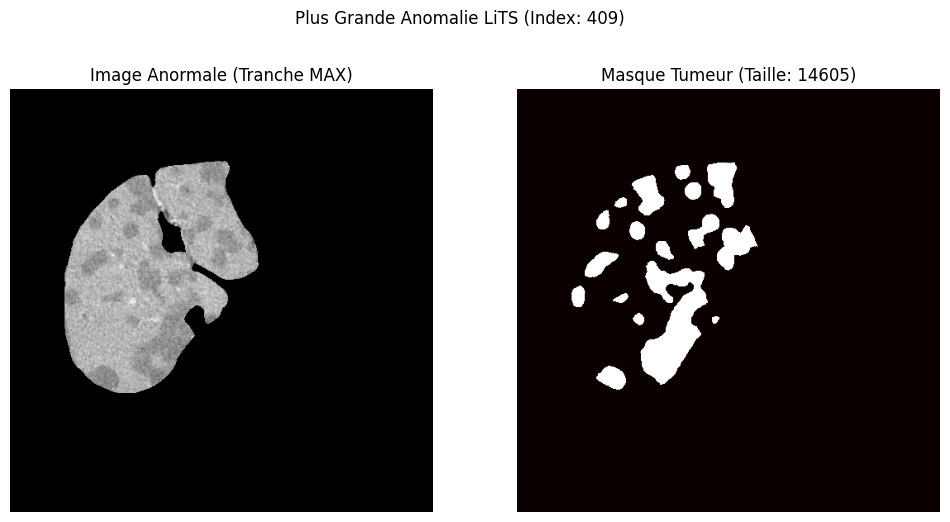

In [10]:
import nibabel as nib
import numpy as np
import glob
import pickle
import os
import random
import cv2
import math
from matplotlib import pyplot as plt

random.seed(314)
np.random.seed(314)

def generate_lits_datasets(volume_files, segmentation_files, num_anomalous_data=1000):
    """
    Parcourt les paires de volume/segmentation LiTS, applique le prétraitement (recadrage HU, normalisation),
    sépare les tranches en saines (healthy) et anormales (anomalous), et génère les jeux de données finaux.

    :param volume_files: Liste des chemins des fichiers de volume.
    :param segmentation_files: Liste des chemins des fichiers de segmentation.
    :param num_anomalous_data: Nombre maximum de tranches anormales à conserver pour le jeu de test.
    :return: healthy train/test datasets with liver masks, anomalous test dataset with tumor masks (sous forme de listes/np.array).
    """

    healthy_abdomen_images = []
    healthy_liver_masks = []
    anomalous_abdomen_images = []
    tumor_masks = []

    # ----------------------------------------------------------------
    # 1. PARAMÈTRES DE PRÉTRAITEMENT
    # ----------------------------------------------------------------
    HU_min = -200 # Seuil bas pour le foie/tissus mous
    HU_max = 250  # Seuil haut pour le foie/tissus mous

    # NOTE: Ces images ne sont PAS redimensionnées ici (512x512)
    # La redimensionnement (e.g., 128x128) est fait plus tard par le DataLoader.

    for i in range(len(volume_files)):
        print(f"Processing volume {i+1}/{len(volume_files)}: {os.path.basename(volume_files[i])}")

        try:
            # Charger les données NIfTI
            volume_data = nib.load(volume_files[i]).get_fdata().astype(np.float32)
            segmentation_data = nib.load(segmentation_files[i]).get_fdata().astype(np.uint8)
        except Exception as e:
            print(f"Erreur lors du chargement: {e}")
            continue

        # Assurer la cohérence (Z, Y, X) ou (Y, X, Z) selon le besoin.
        # LiTS est souvent chargé comme (X, Y, Z), transposer en (Z, X, Y) pour itération par tranche (Z).
        # Nous allons itérer sur l'axe Z (tranches).
        volume_data = np.transpose(volume_data, (2, 1, 0))
        segmentation_data = np.transpose(segmentation_data, (2, 1, 0))

        # ----------------------------------------------------------------
        # 2. NORMALISATION ET MASQUAGE
        # ----------------------------------------------------------------

        # Recadrage et Normalisation Min-Max [0, 1]
        volume_data = np.clip(volume_data, HU_min, HU_max)
        volume_data = (volume_data - HU_min) / (HU_max - HU_min)

        # Définition des masques: 0: Arrière-plan, 1: Foie, 2: Tumeur
        liver_mask_all = (segmentation_data == 1) | (segmentation_data == 2) # Foie + Tumeur
        tumor_mask = segmentation_data == 2 # Tumeur seule

        num_slices = volume_data.shape[0]

        for z in range(num_slices):
            v_slice = volume_data[z, :, :]
            l_mask_slice = liver_mask_all[z, :, :]
            t_mask_slice = tumor_mask[z, :, :]

            # Si la tranche contient du Foie (avec ou sans tumeur)
            if np.any(l_mask_slice):
                # Image du Foie seulement (le reste est mis à 0 après normalisation)
                masked_v_slice = v_slice.copy()
                masked_v_slice[~l_mask_slice] = 0.0

                # Cas Anormal (Anomalous): Tumeur présente
                if np.any(t_mask_slice):
                    anomalous_abdomen_images.append(masked_v_slice)
                    tumor_masks.append(t_mask_slice)

                # Cas Sain (Healthy): Foie présent, AUCUNE Tumeur
                else:
                    healthy_abdomen_images.append(masked_v_slice)
                    healthy_liver_masks.append(l_mask_slice)

        # Libérer la mémoire (optionnel)
        del volume_data, segmentation_data

    print(f"\n--- Prétraitement Terminé ---")
    print(f"Total tranches Saines trouvées: {len(healthy_abdomen_images)}")
    print(f"Total tranches Anormales trouvées: {len(anomalous_abdomen_images)}")

    # Convertir en np.array pour faciliter le slicing
    healthy_abdomen_images = np.array(healthy_abdomen_images, dtype=np.float32)
    healthy_liver_masks = np.array(healthy_liver_masks, dtype=np.uint8)
    anomalous_abdomen_images = np.array(anomalous_abdomen_images, dtype=np.float32)
    tumor_masks = np.array(tumor_masks, dtype=np.uint8)

    # ----------------------------------------------------------------
    # 3. SÉPARATION TRAIN/TEST (HEALTHY) ET SOUS-ÉCHANTILLONNAGE (ANOMALOUS)
    # ----------------------------------------------------------------

    # 80% pour l'entraînement, 20% pour le test (healthy)
    all_healthy_indices = np.arange(len(healthy_abdomen_images))
    random.shuffle(all_healthy_indices)

    split_idx = int(0.8 * len(healthy_abdomen_images))
    train_indices = all_healthy_indices[:split_idx]
    test_healthy_indices = all_healthy_indices[split_idx:]

    train_healthy_abdomen_images = healthy_abdomen_images[train_indices]
    train_healthy_liver_masks = healthy_liver_masks[train_indices]
    test_healthy_abdomen_images = healthy_abdomen_images[test_healthy_indices]
    test_healthy_liver_masks = healthy_liver_masks[test_healthy_indices]

    # Sous-échantillonnage des données anormales (anomalous) pour le test
    if len(anomalous_abdomen_images) > num_anomalous_data:
        test_anomalous_indices = np.random.choice(len(anomalous_abdomen_images), size=num_anomalous_data, replace=False)
        test_anomalous_abdomen_images = anomalous_abdomen_images[test_anomalous_indices]
        test_tumor_masks = tumor_masks[test_anomalous_indices]
    else:
        test_anomalous_abdomen_images = anomalous_abdomen_images
        test_tumor_masks = tumor_masks

    return (train_healthy_abdomen_images, train_healthy_liver_masks,
            test_healthy_abdomen_images, test_healthy_liver_masks,
            test_anomalous_abdomen_images, test_tumor_masks)


def run_lits_preprocessing(raw_data_path, output_path, start_id, end_id, show_images=False):
    """
    Fonction principale pour charger, traiter et sauvegarder le jeu de données LiTS.
    """

    # 1. Création du dossier de sortie
    os.makedirs(output_path, exist_ok=True)

    print(f"Collecte des fichiers LiTS dans {raw_data_path}")

    # 2. Construction des chemins de fichiers pour la plage [start_id, end_id]
    volume_files = []
    segmentation_files = []

    for i in range(start_id, end_id + 1):
        # Utilisation de os.path.join pour la compatibilité des chemins Windows
        vol_name = f"volume-{i}.nii"
        seg_name = f"segmentation-{i}.nii"

        vol_path = os.path.join(raw_data_path, vol_name)
        seg_path = os.path.join(raw_data_path, seg_name)

        # Vérification si les fichiers existent (peut être .nii ou .nii.gz)
        if os.path.exists(vol_path):
            volume_files.append(vol_path)
            segmentation_files.append(seg_path)
        elif os.path.exists(vol_path + '.gz'):
            volume_files.append(vol_path + '.gz')
            segmentation_files.append(seg_path + '.gz')
        else:
            print(f"Avertissement: Fichiers manquants pour l'ID {i}.")

    if not volume_files:
        print("ERREUR: Aucun volume LiTS trouvé dans la plage spécifiée.")
        return

    print(f"Nombre total de paires volume/segmentation trouvées: {len(volume_files)}")

    # 3. Génération des jeux de données prétraités
    (train_healthy_images, train_healthy_masks,
     test_healthy_images, test_healthy_masks,
     test_anomalous_images, test_tumor_masks) = generate_lits_datasets(
        volume_files, segmentation_files
    )

    # 4. Sauvegarde des jeux de données dans le dossier de sortie

    datasets_to_save = {
        "train_healthy_abdomen_dataset.pkl": train_healthy_images,
        "train_healthy_liver_masks.pkl": train_healthy_masks,
        "test_healthy_abdomen_dataset.pkl": test_healthy_images,
        "test_anomalous_abdomen_dataset.pkl": test_anomalous_images,
        "test_anomalous_tumor_masks.pkl": test_tumor_masks
    }

    for filename, data_array in datasets_to_save.items():
        save_path = os.path.join(output_path, filename)
        with open(save_path, "wb") as f:
            pickle.dump(data_array, f)
        print(f"Sauvegardé {filename}: {len(data_array)} tranches.")

    # --- AJOUT DE LA LOGIQUE POUR TROUVER ET VISUALISER LA PLUS GRANDE ANOMALIE ---
    # Cette logique fait maintenant partie de run_lits_preprocessing pour être exécutée
    # immédiatement après la génération et la sauvegarde.

    if test_tumor_masks.size > 0:
        # 5. Calculer la taille de chaque tumeur (somme des pixels == 1)
        # Chaque élément est un masque numpy.uint8 (0 ou 1)
        tumor_sizes = np.sum(test_tumor_masks, axis=(1, 2))

        # 6. Trouver l'indice de la taille maximale
        max_tumor_index = np.argmax(tumor_sizes)
        max_tumor_size = tumor_sizes[max_tumor_index]

        # 7. Récupérer l'image et le masque correspondants
        max_anomaly_image = test_anomalous_images[max_tumor_index]
        max_anomaly_mask = test_tumor_masks[max_tumor_index]

        print("-" * 50)
        print(f"ANALYSE DES ANOMALIES DE TEST:")
        print(f"Taille maximale de tumeur trouvée (pixels): {max_tumor_size} à l'index {max_tumor_index}.")
        print("-" * 50)

        # 8. Affichage si show_images est Vrai ou si nous voulons juste l'afficher
        if show_images or True: # Force l'affichage de la plus grande anomalie
            plt.figure(figsize=(12, 6))

            plt.subplot(1, 2, 1)
            plt.imshow(max_anomaly_image, cmap='gray')
            plt.title("Image Anormale (Tranche MAX)")
            plt.axis('off')

            plt.subplot(1, 2, 2)
            # Affichage du masque avec une colormap pour une meilleure visualisation
            plt.imshow(max_anomaly_mask, cmap='hot')
            plt.title(f"Masque Tumeur (Taille: {max_tumor_size})")
            plt.axis('off')

            plt.suptitle(f"Plus Grande Anomalie LiTS Prétraitée (Index: {max_tumor_index})")
            plt.show()

# --- NOUVELLE FONCTION POUR ANALYSER UN FICHIER EXISTANT ---
def analyze_largest_anomaly(output_path):
    """
    Charge le fichier test_anomalous_tumor_masks.pkl et trouve la tranche avec
    la plus grande anomalie (tumeur).

    :param output_path: Chemin du dossier où les fichiers PKL sont sauvegardés (ex: .../output/LiTS).
    """
    masks_file = os.path.join(output_path, "test_anomalous_tumor_masks.pkl")
    images_file = os.path.join(output_path, "test_anomalous_abdomen_dataset.pkl")

    if not os.path.exists(masks_file) or not os.path.exists(images_file):
        print("-" * 50)
        print(f"ERREUR: Les fichiers PKL de test n'existent pas dans {output_path}.")
        print("Veuillez d'abord exécuter le prétraitement ou vérifier le chemin.")
        print("-" * 50)
        return

    print(f"Chargement des masques et images depuis {output_path}...")

    # 1. Charger les masques et les images
    with open(masks_file, "rb") as f:
        test_tumor_masks = pickle.load(f)

    with open(images_file, "rb") as f:
        test_anomalous_images = pickle.load(f)

    # Vérification que ce sont bien des numpy arrays
    test_tumor_masks = np.array(test_tumor_masks, dtype=np.uint8)
    test_anomalous_images = np.array(test_anomalous_images, dtype=np.float32)

    if test_tumor_masks.size == 0:
        print("Aucune anomalie n'a été trouvée dans le jeu de données test.")
        return

    # 2. Calculer la taille de chaque tumeur (somme des pixels == 1)
    tumor_sizes = np.sum(test_tumor_masks, axis=(1, 2))

    # 3. Trouver l'indice de la taille maximale
    max_tumor_index = np.argmax(tumor_sizes)
    max_tumor_size = tumor_sizes[max_tumor_index]

    # 4. Récupérer l'image et le masque correspondants
    max_anomaly_image = test_anomalous_images[max_tumor_index]
    max_anomaly_mask = test_tumor_masks[max_tumor_index]

    print("-" * 50)
    print(f"ANALYSE DE LA PLUS GRANDE ANOMALIE:")
    print(f"Taille maximale de tumeur trouvée (pixels): {max_tumor_size} à l'index {max_tumor_index}.")
    print("-" * 50)

    # 5. Affichage
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(max_anomaly_image, cmap='gray')
    plt.title("Image Anormale (Tranche MAX)")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(max_anomaly_mask, cmap='hot')
    plt.title(f"Masque Tumeur (Taille: {max_tumor_size})")
    plt.axis('off')

    plt.suptitle(f"Plus Grande Anomalie LiTS (Index: {max_tumor_index})")
    plt.show()


# --- BLOC D'EXÉCUTION À UTILISER DANS LE NOTEBOOK ---
# # LITS_RAW_DIR = r"C:\Users\danku\Documents\Уроки\ENS\3A\MVA\S1\Medical imaging\Code_medical_image_analysis\Datasets\Lits\Training Batch 2"
# # LITS_OUTPUT_DIR = r"C:\Users\danku\Documents\Уроки\ENS\3A\MVA\S1\Medical imaging\Code_medical_image_analysis\Synomaly-main\Synomaly-main\output\LiTS"
# # Pour PRÉTRAITEMENT et SAUVEGARDE:
# # run_lits_preprocessing(LITS_RAW_DIR, LITS_OUTPUT_DIR, start_id=28, end_id=130, show_images=False)
# # Pour ANALYSE D'UN FICHIER EXISTANT:
analyze_largest_anomaly(LITS_OUTPUT_DIR)

Chargement des masques et images depuis C:\Users\danku\Documents\Уроки\ENS\3A\MVA\S1\Medical imaging\Code_medical_image_analysis\Synomaly-main\Synomaly-main\output\LiTS...
--------------------------------------------------
ANALYSE DE LA PLUS GRANDE ANOMALIE:
Taille maximale de tumeur trouvée (pixels): 14605 à l'index 409.
--------------------------------------------------


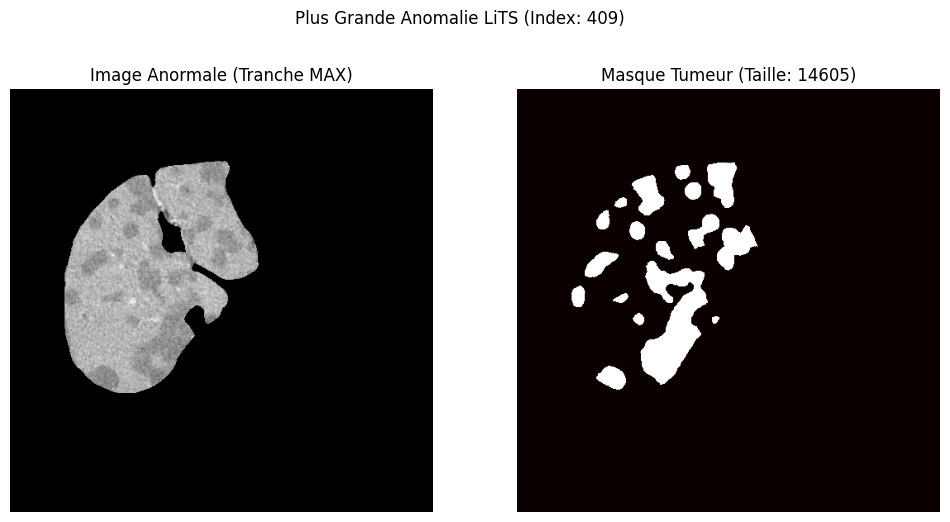

In [11]:
import nibabel as nib
import numpy as np
import glob
import pickle
import os
import random
import cv2
import math
from matplotlib import pyplot as plt

random.seed(314)
np.random.seed(314)

def generate_lits_datasets(volume_files, segmentation_files, num_anomalous_data=1000):
    """
    Parcourt les paires de volume/segmentation LiTS, applique le prétraitement (recadrage HU, normalisation),
    sépare les tranches en saines (healthy) et anormales (anomalous), et génère les jeux de données finaux.

    :param volume_files: Liste des chemins des fichiers de volume.
    :param segmentation_files: Liste des chemins des fichiers de segmentation.
    :param num_anomalous_data: Nombre maximum de tranches anormales à conserver pour le jeu de test.
    :return: healthy train/test datasets with liver masks, anomalous test dataset with tumor masks (sous forme de listes/np.array).
    """

    healthy_abdomen_images = []
    healthy_liver_masks = []
    anomalous_abdomen_images = []
    tumor_masks = []

    # ----------------------------------------------------------------
    # 1. PARAMÈTRES DE PRÉTRAITEMENT
    # ----------------------------------------------------------------
    HU_min = -200 # Seuil bas pour le foie/tissus mous
    HU_max = 250  # Seuil haut pour le foie/tissus mous

    # NOTE: Ces images ne sont PAS redimensionnées ici (512x512)
    # La redimensionnement (e.g., 128x128) est fait plus tard par le DataLoader.

    for i in range(len(volume_files)):
        print(f"Processing volume {i+1}/{len(volume_files)}: {os.path.basename(volume_files[i])}")

        try:
            # Charger les données NIfTI
            volume_data = nib.load(volume_files[i]).get_fdata().astype(np.float32)
            segmentation_data = nib.load(segmentation_files[i]).get_fdata().astype(np.uint8)
        except Exception as e:
            print(f"Erreur lors du chargement: {e}")
            continue

        # Assurer la cohérence (Z, Y, X) ou (Y, X, Z) selon le besoin.
        # LiTS est souvent chargé comme (X, Y, Z), transposer en (Z, X, Y) pour itération par tranche (Z).
        # Nous allons itérer sur l'axe Z (tranches).
        volume_data = np.transpose(volume_data, (2, 1, 0))
        segmentation_data = np.transpose(segmentation_data, (2, 1, 0))

        # ----------------------------------------------------------------
        # 2. NORMALISATION ET MASQUAGE
        # ----------------------------------------------------------------

        # Recadrage et Normalisation Min-Max [0, 1]
        volume_data = np.clip(volume_data, HU_min, HU_max)
        volume_data = (volume_data - HU_min) / (HU_max - HU_min)

        # Définition des masques: 0: Arrière-plan, 1: Foie, 2: Tumeur
        liver_mask_all = (segmentation_data == 1) | (segmentation_data == 2) # Foie + Tumeur
        tumor_mask = segmentation_data == 2 # Tumeur seule

        num_slices = volume_data.shape[0]

        for z in range(num_slices):
            v_slice = volume_data[z, :, :]
            l_mask_slice = liver_mask_all[z, :, :]
            t_mask_slice = tumor_mask[z, :, :]

            # Si la tranche contient du Foie (avec ou sans tumeur)
            if np.any(l_mask_slice):
                # Image du Foie seulement (le reste est mis à 0 après normalisation)
                masked_v_slice = v_slice.copy()
                masked_v_slice[~l_mask_slice] = 0.0

                # Cas Anormal (Anomalous): Tumeur présente
                if np.any(t_mask_slice):
                    anomalous_abdomen_images.append(masked_v_slice)
                    tumor_masks.append(t_mask_slice)

                # Cas Sain (Healthy): Foie présent, AUCUNE Tumeur
                else:
                    healthy_abdomen_images.append(masked_v_slice)
                    healthy_liver_masks.append(l_mask_slice)

        # Libérer la mémoire (optionnel)
        del volume_data, segmentation_data

    print(f"\n--- Prétraitement Terminé ---")
    print(f"Total tranches Saines trouvées: {len(healthy_abdomen_images)}")
    print(f"Total tranches Anormales trouvées: {len(anomalous_abdomen_images)}")

    # Convertir en np.array pour faciliter le slicing
    healthy_abdomen_images = np.array(healthy_abdomen_images, dtype=np.float32)
    healthy_liver_masks = np.array(healthy_liver_masks, dtype=np.uint8)
    anomalous_abdomen_images = np.array(anomalous_abdomen_images, dtype=np.float32)
    tumor_masks = np.array(tumor_masks, dtype=np.uint8)

    # ----------------------------------------------------------------
    # 3. SÉPARATION TRAIN/TEST (HEALTHY) ET SOUS-ÉCHANTILLONNAGE (ANOMALOUS)
    # ----------------------------------------------------------------

    # 80% pour l'entraînement, 20% pour le test (healthy)
    all_healthy_indices = np.arange(len(healthy_abdomen_images))
    random.shuffle(all_healthy_indices)

    split_idx = int(0.8 * len(healthy_abdomen_images))
    train_indices = all_healthy_indices[:split_idx]
    test_healthy_indices = all_healthy_indices[split_idx:]

    train_healthy_abdomen_images = healthy_abdomen_images[train_indices]
    train_healthy_liver_masks = healthy_liver_masks[train_indices]
    test_healthy_abdomen_images = healthy_abdomen_images[test_healthy_indices]
    test_healthy_liver_masks = healthy_liver_masks[test_healthy_indices]

    # Sous-échantillonnage des données anormales (anomalous) pour le test
    if len(anomalous_abdomen_images) > num_anomalous_data:
        test_anomalous_indices = np.random.choice(len(anomalous_abdomen_images), size=num_anomalous_data, replace=False)
        test_anomalous_abdomen_images = anomalous_abdomen_images[test_anomalous_indices]
        test_tumor_masks = tumor_masks[test_anomalous_indices]
    else:
        test_anomalous_abdomen_images = anomalous_abdomen_images
        test_tumor_masks = tumor_masks

    return (train_healthy_abdomen_images, train_healthy_liver_masks,
            test_healthy_abdomen_images, test_healthy_liver_masks,
            test_anomalous_abdomen_images, test_tumor_masks)


def run_lits_preprocessing(raw_data_path, output_path, start_id, end_id, show_images=False):
    """
    Fonction principale pour charger, traiter et sauvegarder le jeu de données LiTS.
    """

    # 1. Création du dossier de sortie
    os.makedirs(output_path, exist_ok=True)

    print(f"Collecte des fichiers LiTS dans {raw_data_path}")

    # 2. Construction des chemins de fichiers pour la plage [start_id, end_id]
    volume_files = []
    segmentation_files = []

    for i in range(start_id, end_id + 1):
        # Utilisation de os.path.join pour la compatibilité des chemins Windows
        vol_name = f"volume-{i}.nii"
        seg_name = f"segmentation-{i}.nii"

        vol_path = os.path.join(raw_data_path, vol_name)
        seg_path = os.path.join(raw_data_path, seg_name)

        # Vérification si les fichiers existent (peut être .nii ou .nii.gz)
        if os.path.exists(vol_path):
            volume_files.append(vol_path)
            segmentation_files.append(seg_path)
        elif os.path.exists(vol_path + '.gz'):
            volume_files.append(vol_path + '.gz')
            segmentation_files.append(seg_path + '.gz')
        else:
            print(f"Avertissement: Fichiers manquants pour l'ID {i}.")

    if not volume_files:
        print("ERREUR: Aucun volume LiTS trouvé dans la plage spécifiée.")
        return

    print(f"Nombre total de paires volume/segmentation trouvées: {len(volume_files)}")

    # 3. Génération des jeux de données prétraités
    (train_healthy_images, train_healthy_masks,
     test_healthy_images, test_healthy_masks,
     test_anomalous_images, test_tumor_masks) = generate_lits_datasets(
        volume_files, segmentation_files
    )

    # 4. Sauvegarde des jeux de données dans le dossier de sortie

    datasets_to_save = {
        "train_healthy_abdomen_dataset.pkl": train_healthy_images,
        "train_healthy_liver_masks.pkl": train_healthy_masks,
        "test_healthy_abdomen_dataset.pkl": test_healthy_images,
        "test_anomalous_abdomen_dataset.pkl": test_anomalous_images,
        "test_anomalous_tumor_masks.pkl": test_tumor_masks
    }

    for filename, data_array in datasets_to_save.items():
        save_path = os.path.join(output_path, filename)
        with open(save_path, "wb") as f:
            pickle.dump(data_array, f)
        print(f"Sauvegardé {filename}: {len(data_array)} tranches.")

    # --- AJOUT DE LA LOGIQUE POUR TROUVER ET VISUALISER LA PLUS GRANDE ANOMALIE ---
    # Cette logique fait maintenant partie de run_lits_preprocessing pour être exécutée
    # immédiatement après la génération et la sauvegarde.

    if test_tumor_masks.size > 0:
        # 5. Calculer la taille de chaque tumeur (somme des pixels == 1)
        # Chaque élément est un masque numpy.uint8 (0 ou 1)
        tumor_sizes = np.sum(test_tumor_masks, axis=(1, 2))

        # 6. Trouver l'indice de la taille maximale
        max_tumor_index = np.argmax(tumor_sizes)
        max_tumor_size = tumor_sizes[max_tumor_index]

        # 7. Récupérer l'image et le masque correspondants
        max_anomaly_image = test_anomalous_images[max_tumor_index]
        max_anomaly_mask = test_tumor_masks[max_tumor_index]

        print("-" * 50)
        print(f"ANALYSE DES ANOMALIES DE TEST:")
        print(f"Taille maximale de tumeur trouvée (pixels): {max_tumor_size} à l'index {max_tumor_index}.")
        print("-" * 50)

        # 8. Affichage si show_images est Vrai ou si nous voulons juste l'afficher
        if show_images or True: # Force l'affichage de la plus grande anomalie
            plt.figure(figsize=(12, 6))

            plt.subplot(1, 2, 1)
            plt.imshow(max_anomaly_image, cmap='gray')
            plt.title("Image Anormale (Tranche MAX)")
            plt.axis('off')

            plt.subplot(1, 2, 2)
            # Affichage du masque avec une colormap pour une meilleure visualisation
            plt.imshow(max_anomaly_mask, cmap='hot')
            plt.title(f"Masque Tumeur (Taille: {max_tumor_size})")
            plt.axis('off')

            plt.suptitle(f"Plus Grande Anomalie LiTS Prétraitée (Index: {max_tumor_index})")
            plt.show()

# --- NOUVELLE FONCTION POUR ANALYSER UN FICHIER EXISTANT ---
def analyze_largest_anomaly(output_path):
    """
    Charge le fichier test_anomalous_tumor_masks.pkl et trouve la tranche avec
    la plus grande anomalie (tumeur).

    :param output_path: Chemin du dossier où les fichiers PKL sont sauvegardés (ex: .../output/LiTS).
    :return: Tuple (image, masque) de la tranche avec la plus grande anomalie, ou (None, None) si échec.
    """
    masks_file = os.path.join(output_path, "test_anomalous_tumor_masks.pkl")
    images_file = os.path.join(output_path, "test_anomalous_abdomen_dataset.pkl")

    if not os.path.exists(masks_file) or not os.path.exists(images_file):
        print("-" * 50)
        print(f"ERREUR: Les fichiers PKL de test n'existent pas dans {output_path}.")
        print("Veuillez d'abord exécuter le prétraitement ou vérifier le chemin.")
        print("-" * 50)
        return None, None # Retourne (None, None) en cas d'erreur de chemin

    print(f"Chargement des masques et images depuis {output_path}...")

    try:
        # 1. Charger les masques et les images
        with open(masks_file, "rb") as f:
            test_tumor_masks = pickle.load(f)

        with open(images_file, "rb") as f:
            test_anomalous_images = pickle.load(f)
    except Exception as e:
        print(f"Erreur lors du chargement des fichiers PKL: {e}")
        return None, None

    # Vérification que ce sont bien des numpy arrays
    test_tumor_masks = np.array(test_tumor_masks, dtype=np.uint8)
    test_anomalous_images = np.array(test_anomalous_images, dtype=np.float32)

    if test_tumor_masks.size == 0 or len(test_tumor_masks.shape) < 3:
        print("Aucune anomalie n'a été trouvée ou le format des données est incorrect.")
        return None, None

    # 2. Calculer la taille de chaque tumeur (somme des pixels == 1)
    # Somme sur les axes Y et X (axes 1 et 2 pour le format N, H, W)
    tumor_sizes = np.sum(test_tumor_masks, axis=(1, 2))

    # 3. Trouver l'indice de la taille maximale
    max_tumor_index = np.argmax(tumor_sizes)
    max_tumor_size = tumor_sizes[max_tumor_index]

    # 4. Récupérer l'image et le masque correspondants
    max_anomaly_image = test_anomalous_images[max_tumor_index]
    max_anomaly_mask = test_tumor_masks[max_tumor_index]

    print("-" * 50)
    print(f"ANALYSE DE LA PLUS GRANDE ANOMALIE:")
    print(f"Taille maximale de tumeur trouvée (pixels): {max_tumor_size} à l'index {max_tumor_index}.")
    print("-" * 50)

    # 5. Affichage
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(max_anomaly_image, cmap='gray')
    plt.title("Image Anormale (Tranche MAX)")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(max_anomaly_mask, cmap='hot')
    plt.title(f"Masque Tumeur (Taille: {max_tumor_size})")
    plt.axis('off')

    plt.suptitle(f"Plus Grande Anomalie LiTS (Index: {max_tumor_index})")
    plt.show()

    # 6. Retourner l'image et le masque
    return max_anomaly_image, max_anomaly_mask


# --- BLOC D'EXÉCUTION À UTILISER DANS LE NOTEBOOK ---
# # LITS_RAW_DIR = r"C:\Users\danku\Documents\Уроки\ENS\3A\MVA\S1\Medical imaging\Code_medical_image_analysis\Datasets\Lits\Training Batch 2"
# # LITS_OUTPUT_DIR = r"C:\Users\danku\Documents\Уроки\ENS\3A\MVA\S1\Medical imaging\Code_medical_image_analysis\Synomaly-main\Synomaly-main\output\LiTS"
# # Pour PRÉTRAITEMENT et SAUVEGARDE:
# # run_lits_preprocessing(LITS_RAW_DIR, LITS_OUTPUT_DIR, start_id=28, end_id=130, show_images=False)
# # Pour ANALYSE D'UN FICHIER EXISTANT:
image_max, masque_max = analyze_largest_anomaly(LITS_OUTPUT_DIR)

In [12]:
image_max.shape

(512, 512)